In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
from sklearn.model_selection import train_test_split,GridSearchCV
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [2]:
#election = pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes',index_col=0)
election = pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')

In [3]:
election.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

In [4]:
print('The shape of the data is ',election.shape)

The shape of the data is  (1525, 10)


In [5]:
election = election.drop('Unnamed: 0',axis=1)
election.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male

In [6]:
print('The shape of the data is ',election.shape)

The shape of the data is  (1525, 9)


In [7]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [8]:
election.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [9]:
election.describe()

age  economic.cond.national  economic.cond.household  \
count  1525.000000             1525.000000              1525.000000   
mean     54.182295                3.245902                 3.140328   
std      15.711209                0.880969                 0.929951   
min      24.000000                1.000000                 1.000000   
25%      41.000000                3.000000                 3.000000   
50%      53.000000                3.000000                 3.000000   
75%      67.000000                4.000000                 4.000000   
max      93.000000                5.000000                 5.000000   

             Blair        Hague       Europe  political.knowledge  
count  1525.000000  1525.000000  1525.000000          1525.000000  
mean      3.334426     2.746885     6.728525             1.542295  
std       1.174824     1.230703     3.297538             1.083315  
min       1.000000     1.000000     1.000000             0.000000  
25%       2.000000     2.000000     4.000000             0.000000  
50%       4.000000     2.000000     6.000000             2.000000  
75%       4.000000     4.000000    10.000000             2.000000  
max       5.000000     5.000000    11.000000             3.000000

In [10]:
election.describe(include='all')

vote          age  economic.cond.national  economic.cond.household  \
count     1525  1525.000000             1525.000000              1525.000000   
unique       2          NaN                     NaN                      NaN   
top     Labour          NaN                     NaN                      NaN   
freq      1063          NaN                     NaN                      NaN   
mean       NaN    54.182295                3.245902                 3.140328   
std        NaN    15.711209                0.880969                 0.929951   
min        NaN    24.000000                1.000000                 1.000000   
25%        NaN    41.000000                3.000000                 3.000000   
50%        NaN    53.000000                3.000000                 3.000000   
75%        NaN    67.000000                4.000000                 4.000000   
max        NaN    93.000000                5.000000                 5.000000   

              Blair        Hague       Europe  political.knowledge  gender  
count   1525.000000  1525.000000  1525.000000          1525.000000    1525  
unique          NaN          NaN          NaN                  NaN       2  
top             NaN          NaN          NaN                  NaN  female  
freq            NaN          NaN          NaN                  NaN     812  
mean       3.334426     2.746885     6.728525             1.542295     NaN  
std        1.174824     1.230703     3.297538             1.083315     NaN  
min        1.000000     1.000000     1.000000             0.000000     NaN  
25%        2.000000     2.000000     4.000000             0.000000     NaN  
50%        4.000000     2.000000     6.000000             2.000000     NaN  
75%        4.000000     4.000000    10.000000             2.000000     NaN  
max        5.000000     5.000000    11.000000             3.000000     NaN

In [11]:
election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [12]:
dup = election.duplicated()
print('Number of duplicate rows : ',dup.sum())
print('Duplicated rows:')
election[dup]

Number of duplicate rows :  8
Duplicated rows:


vote  age  economic.cond.national  economic.cond.household  \
67          Labour   35                       4                        4   
626         Labour   39                       3                        4   
870         Labour   38                       2                        4   
983   Conservative   74                       4                        3   
1154  Conservative   53                       3                        4   
1236        Labour   36                       3                        3   
1244        Labour   29                       4                        4   
1438        Labour   40                       4                        3   

      Blair  Hague  Europe  political.knowledge  gender  
67        5      2       3                    2    male  
626       4      2       5                    2    male  
870       2      2       4                    3    male  
983       2      4       8                    2  female  
1154      2      2       6                    0  female  
1236      2      2       6                    2  female  
1244      4      2       2                    2  female  
1438      4      2       2                    2    male

In [13]:
## we can see that 8 rows are duplicated.
## but here rows represent individuals voters (as per the survey conducted)

In [14]:
election = election.drop_duplicates()
election.duplicated().sum()

0

In [15]:
for column in election.drop('age',axis=1):
    print(column.upper(),': ',election[column].nunique())
    print(election[column].value_counts().sort_values())
    print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    256
4    538
3    604
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    435
3    645
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    152
2    434
4    833
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    557
2    617
Name: Hague, dtype: int64


EUROPE :  11
2      77
7      86
10    101
1     109
9     111
8     111
5     123
4     126
3     128
6     207
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    249
0    454
2    776
Name: political.knowledge, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




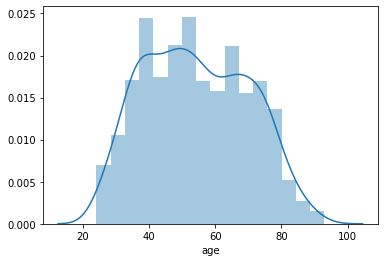

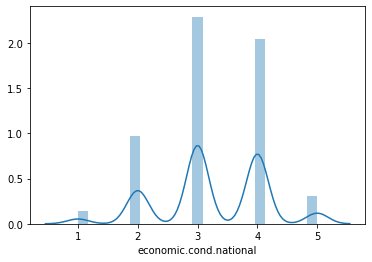

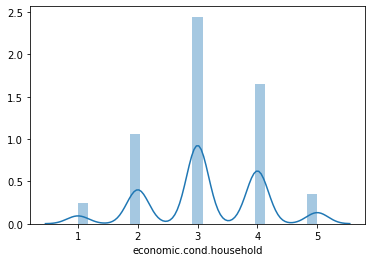

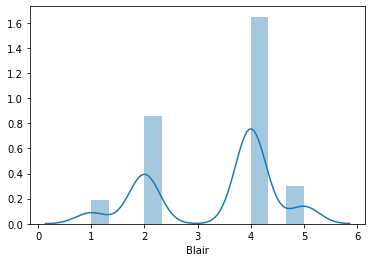

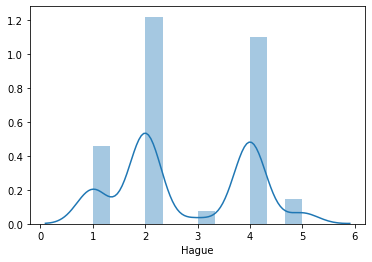

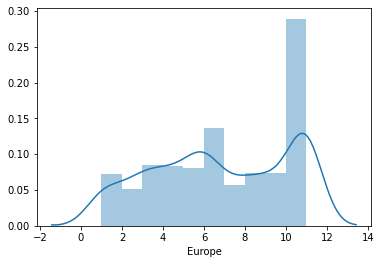

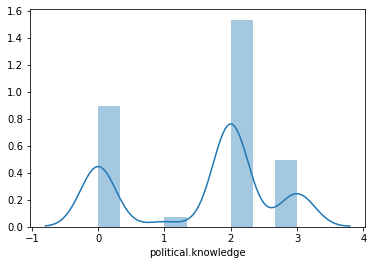

In [16]:
for i in election[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']]:
    sns.distplot(election[i])
    plt.show()

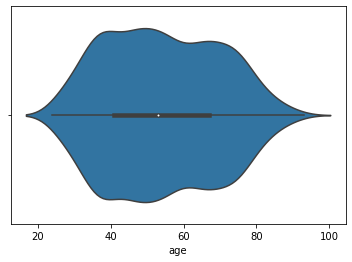

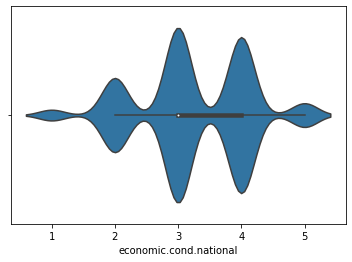

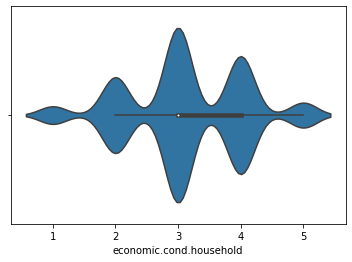

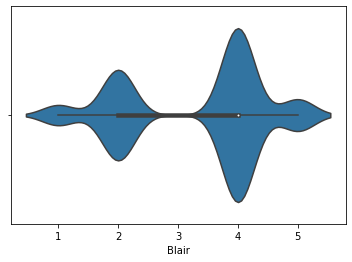

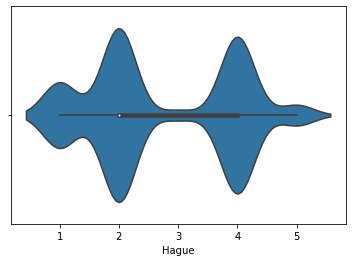

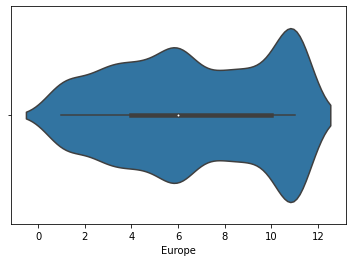

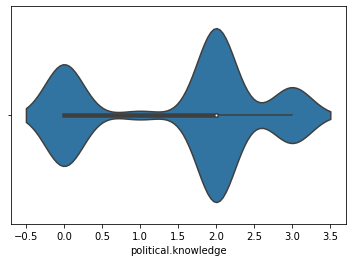

In [17]:
for i in election[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']]:
    sns.violinplot(election[i])
    plt.show()

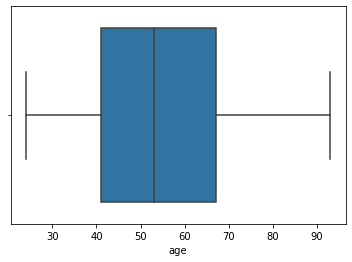

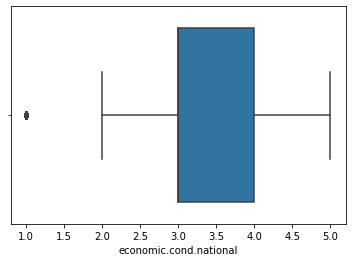

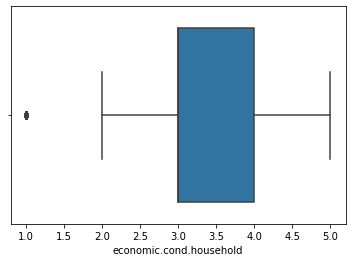

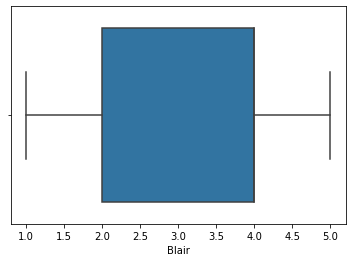

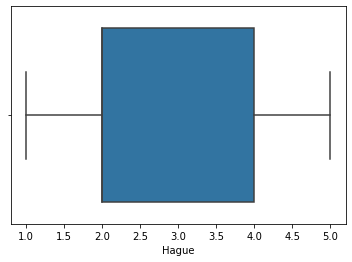

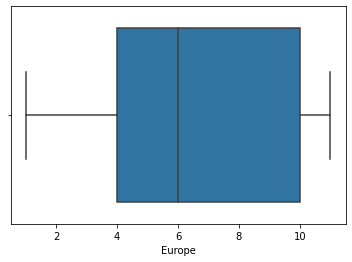

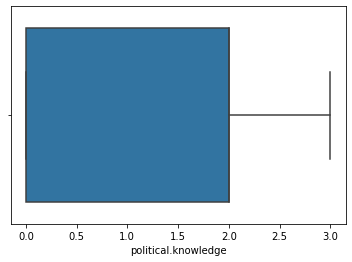

In [19]:
for i in election[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']]:
    sns.boxplot(election[i])
    plt.show()

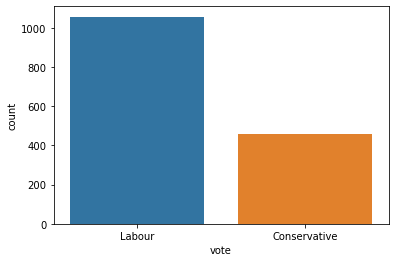

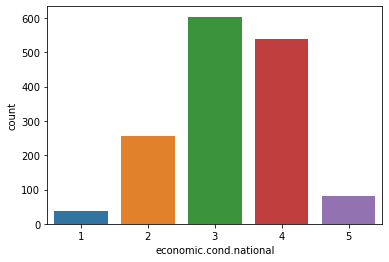

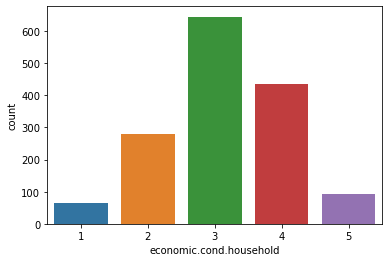

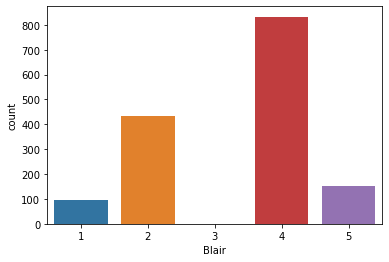

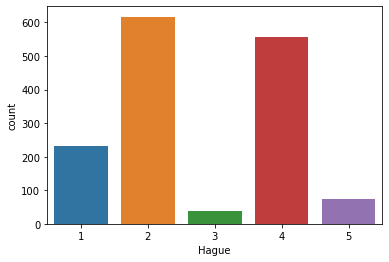

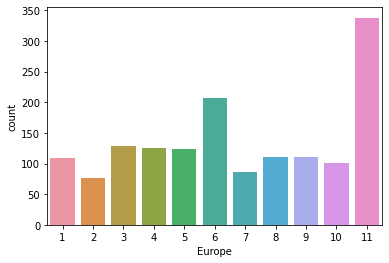

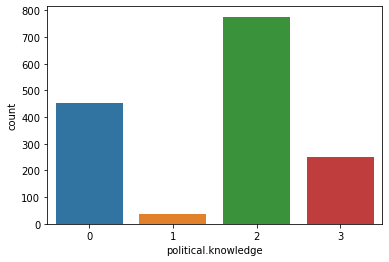

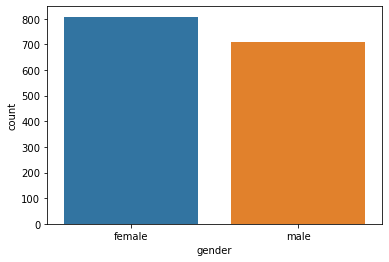

In [20]:
for i in election[['vote','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','gender']]:
    sns.countplot(election[i])
    plt.show()

In [38]:
pd.crosstab(election['economic.cond.national'],election['vote'])

vote                    Conservative  Labour
economic.cond.national                      
1                                 21      16
2                                140     116
3                                199     405
4                                 91     447
5                                  9      73

In [39]:
pd.crosstab(election['economic.cond.household'],election['vote'])

vote                     Conservative  Labour
economic.cond.household                      
1                                  28      37
2                                 126     154
3                                 197     448
4                                  86     349
5                                  23      69

In [40]:
pd.crosstab(election['Blair'],election['vote'])

vote   Conservative  Labour
Blair                      
1                59      38
2               240     194
3                 1       0
4               157     676
5                 3     149

In [41]:
pd.crosstab(election['Hague'],election['vote'])

vote   Conservative  Labour
Hague                      
1                11     222
2                95     522
3                 9      28
4               286     271
5                59      14

In [43]:
pd.crosstab(election['vote'],election['Europe'])

Europe         1   2    3    4    5    6   7   8   9   10   11
vote                                                          
Conservative    5   6   14   18   20   35  32  48  56  54  172
Labour        104  71  114  108  103  172  54  63  55  47  166

In [44]:
pd.crosstab(election['Europe'],election['vote'])

vote    Conservative  Labour
Europe                      
1                  5     104
2                  6      71
3                 14     114
4                 18     108
5                 20     103
6                 35     172
7                 32      54
8                 48      63
9                 56      55
10                54      47
11               172     166

In [45]:
pd.crosstab(election['political.knowledge'],election['vote'])

vote                 Conservative  Labour
political.knowledge                      
0                              94     360
1                              11      27
2                             283     493
3                              72     177

In [46]:
pd.crosstab(election['gender'],election['vote'])

vote    Conservative  Labour
gender                      
female           257     551
male             203     506

<AxesSubplot:xlabel='vote', ylabel='count'>

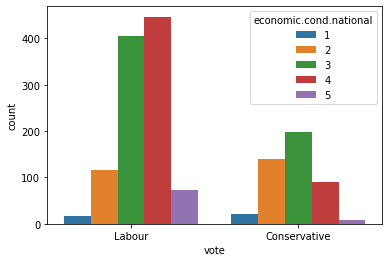

In [28]:
sns.countplot(x=election['vote'],hue=election['economic.cond.national'])

<AxesSubplot:xlabel='vote', ylabel='count'>

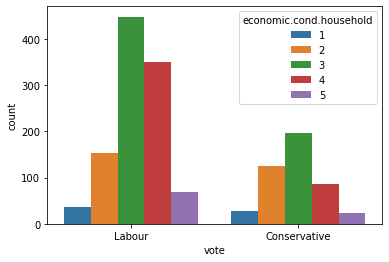

In [29]:
sns.countplot(x=election['vote'],hue=election['economic.cond.household'])

<AxesSubplot:xlabel='vote', ylabel='count'>

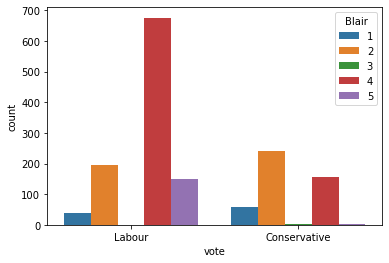

In [30]:
sns.countplot(x = election['vote'],hue=election['Blair'])

<AxesSubplot:xlabel='vote', ylabel='count'>

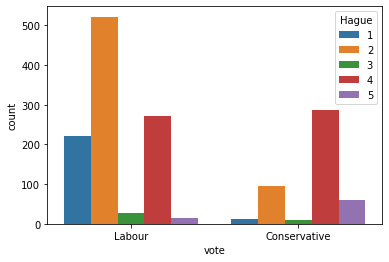

In [31]:
sns.countplot(x = election['vote'],hue=election['Hague'])

<AxesSubplot:xlabel='vote', ylabel='count'>

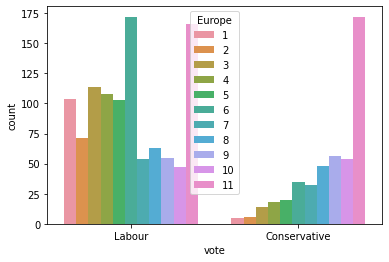

In [32]:
sns.countplot(x = election['vote'],hue=election['Europe'])

<AxesSubplot:xlabel='Europe', ylabel='count'>

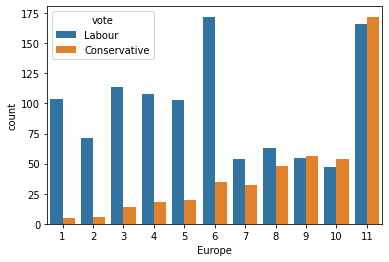

In [33]:
sns.countplot(hue = election['vote'],x=election['Europe'])

<AxesSubplot:xlabel='political.knowledge', ylabel='count'>

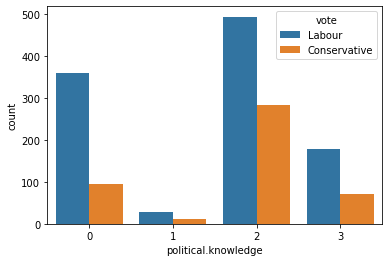

In [34]:
sns.countplot(election['political.knowledge'],hue=election['vote'])

<AxesSubplot:xlabel='vote', ylabel='count'>

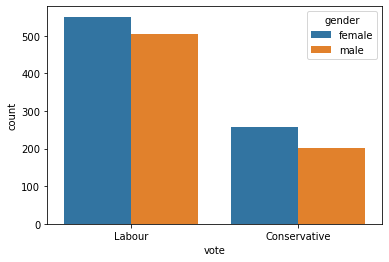

In [35]:
sns.countplot(x = election['vote'],hue=election['gender'])

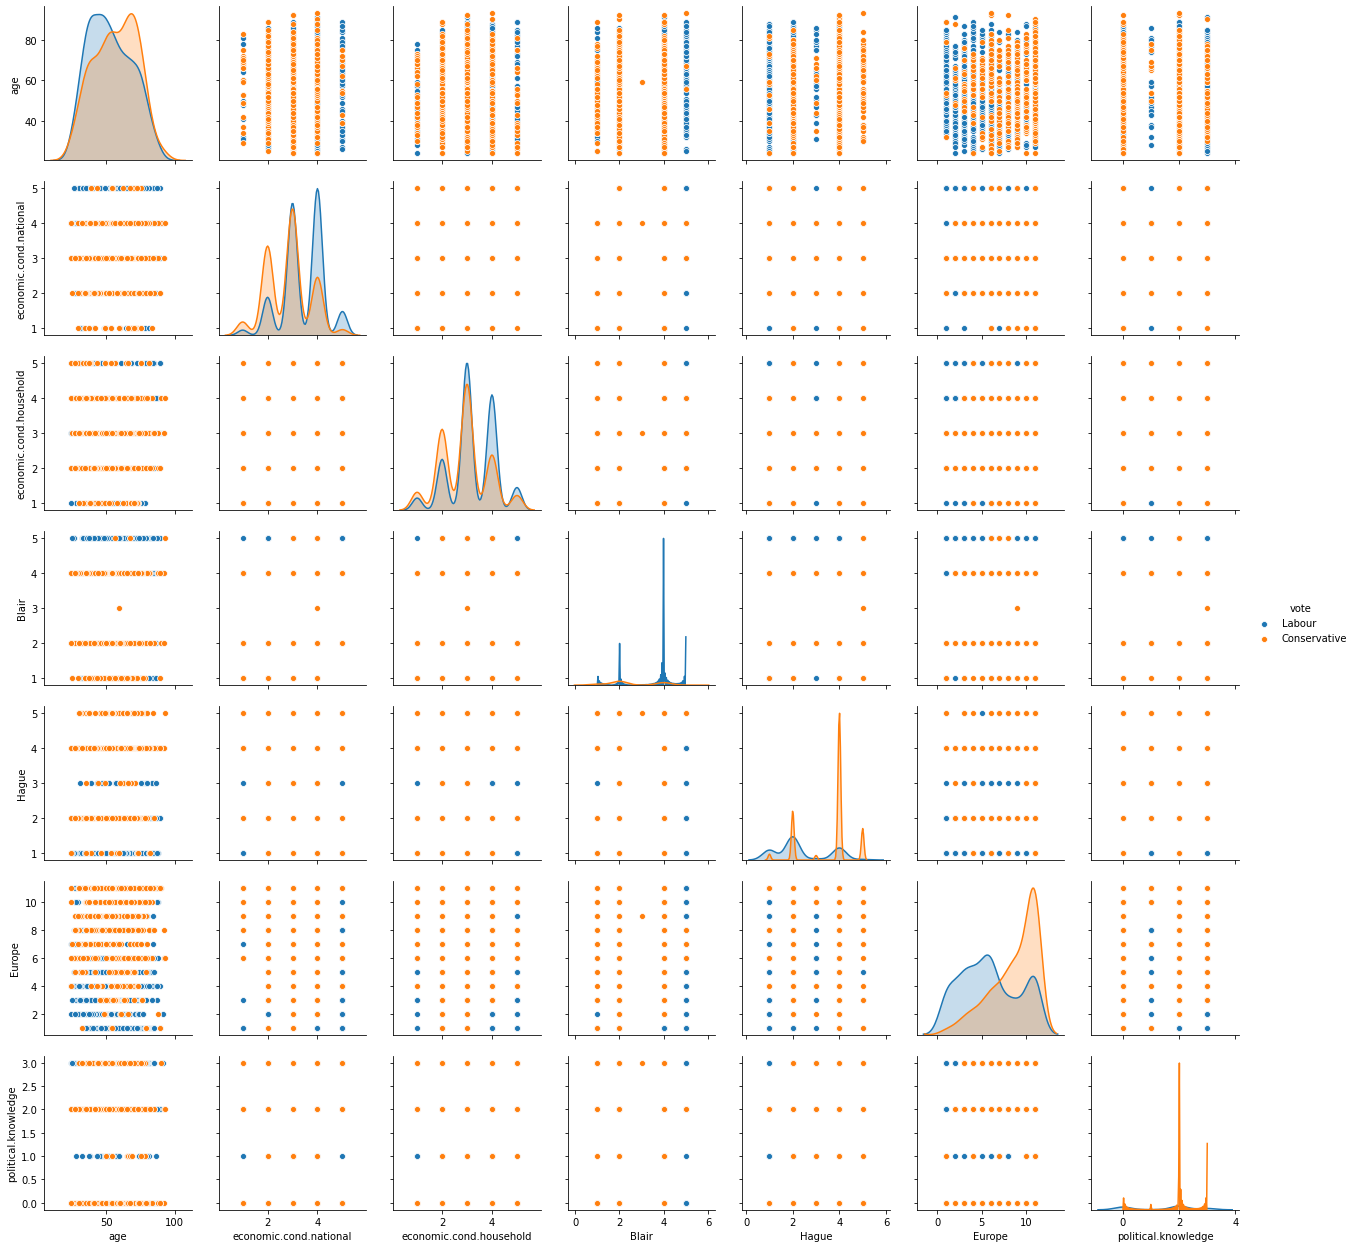

In [36]:
sns.pairplot(election,hue='vote')

<AxesSubplot:>

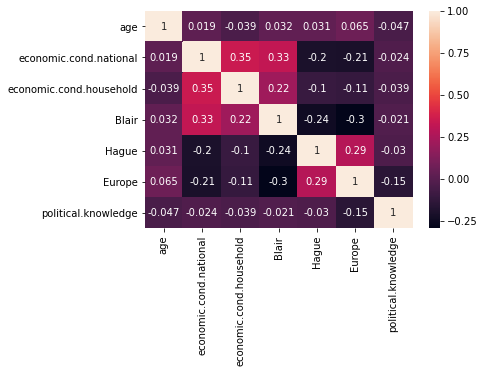

In [37]:
sns.heatmap(election.corr(),annot=True)

In [47]:
election.corr()

age  economic.cond.national  \
age                      1.000000                0.018687   
economic.cond.national   0.018687                1.000000   
economic.cond.household -0.038868                0.347687   
Blair                    0.032084                0.326141   
Hague                    0.031144               -0.200790   
Europe                   0.064562               -0.209150   
political.knowledge     -0.046598               -0.023510   

                         economic.cond.household     Blair     Hague  \
age                                    -0.038868  0.032084  0.031144   
economic.cond.national                  0.347687  0.326141 -0.200790   
economic.cond.household                 1.000000  0.215822 -0.100392   
Blair                                   0.215822  1.000000 -0.243508   
Hague                                  -0.100392 -0.243508  1.000000   
Europe                                 -0.112897 -0.295944  0.285738   
political.knowledge                    -0.038528 -0.021299 -0.029906   

                           Europe  political.knowledge  
age                      0.064562            -0.046598  
economic.cond.national  -0.209150            -0.023510  
economic.cond.household -0.112897            -0.038528  
Blair                   -0.295944            -0.021299  
Hague                    0.285738            -0.029906  
Europe                   1.000000            -0.151197  
political.knowledge     -0.151197             1.000000

In [48]:
Q1 = election.quantile(0.25)
Q3 = election.quantile(0.75)
IQR = Q3-Q1

In [49]:
election_out = election[~((election < (Q1 - 1.5 * IQR)) |(election > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
print("Shape of the data without outlier treatment :",election_out.shape)
print("Shape of the original data  :",election.shape)

Shape of the data without outlier treatment : (1430, 9)
Shape of the original data  : (1517, 9)


<AxesSubplot:>

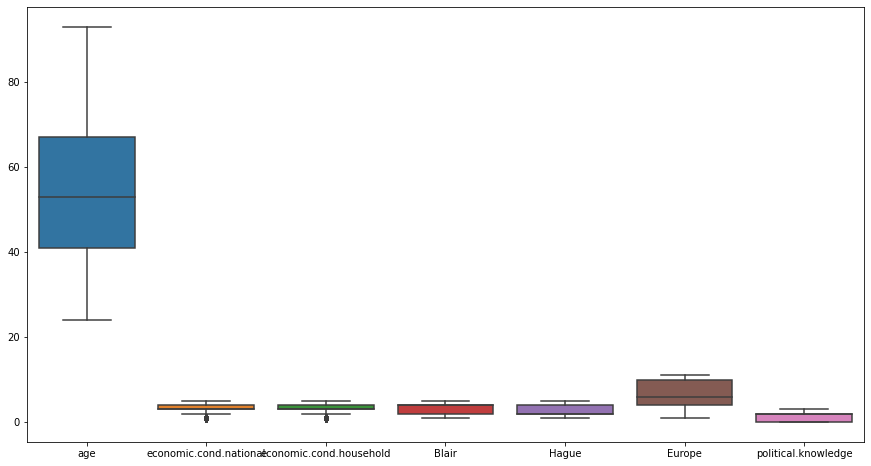

In [50]:
plt.figure(figsize=(15,8))
sns.boxplot(data=election)

In [51]:
Q1a =election['age'].quantile(0.25)
Q3a =election['age'].quantile(0.75)
IQRa=Q3a-Q1a

election.groupby(((election['age'] < (Q1a - 1.5 * IQRa)) |(election['age'] > (Q3a + 1.5 * IQRa)))).size()

age
False    1517
dtype: int64

In [52]:
Q1a =election['economic.cond.national'].quantile(0.25)
Q3a =election['economic.cond.national'].quantile(0.75)
IQRa=Q3a-Q1a

election.groupby(((election['economic.cond.national'] < (Q1a - 1.5 * IQRa)) |(election['economic.cond.national'] > (Q3a + 1.5 * IQRa)))).size()

economic.cond.national
False    1480
True       37
dtype: int64

In [53]:
Q1a =election['economic.cond.household'].quantile(0.25)
Q3a =election['economic.cond.household'].quantile(0.75)
IQRa=Q3a-Q1a

election.groupby(((election['economic.cond.household'] < (Q1a - 1.5 * IQRa)) |(election['economic.cond.household'] > (Q3a + 1.5 * IQRa)))).size()

economic.cond.household
False    1452
True       65
dtype: int64

In [54]:
cols = election.columns
num_cols = election._get_numeric_data().columns 
num_cols

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge'],
      dtype='object')

In [55]:
## checking the outliers only in the continuous column, 
## here only the continuous column is 'age' and it does not have any outliers present in them.
## Hence no outliers present in the data.

In [56]:
election['vote'].dtype

dtype('O')

In [57]:
election['gender'].dtype

dtype('O')

In [58]:
for col in election.columns:
    if election[col].dtype == 'object':
        election[col] = pd.Categorical(election[col]).codes

In [59]:
election['vote'].value_counts()

1    1057
0     460
Name: vote, dtype: int64

In [60]:
election['gender'].value_counts()

0    808
1    709
Name: gender, dtype: int64

In [61]:
election.dtypes

vote                        int8
age                        int64
economic.cond.national     int64
economic.cond.household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political.knowledge        int64
gender                      int8
dtype: object

In [62]:
election.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0     1   43                       3                        3      4      1   
1     1   36                       4                        4      4      4   
2     1   35                       4                        4      5      2   
3     1   24                       4                        2      2      1   
4     1   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2       0  
1       5                    2       1  
2       3                    2       1  
3       4                    0       0  
4       6                    2       1

<AxesSubplot:>

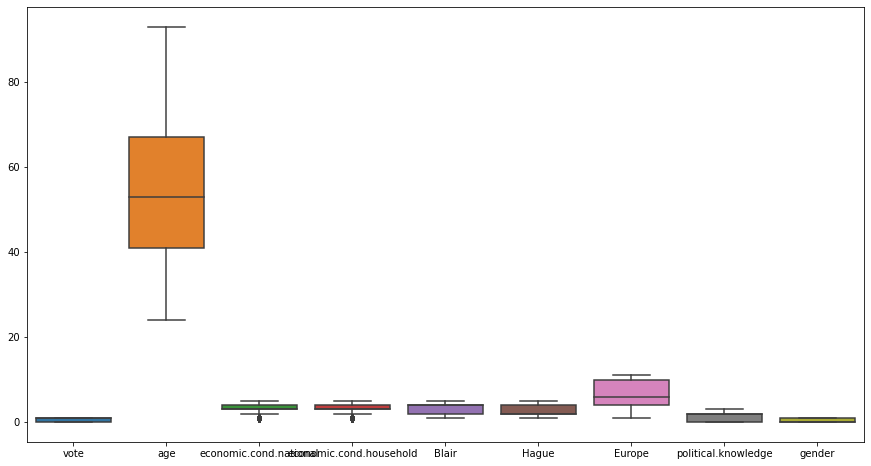

In [63]:
plt.figure(figsize=(15,8))
sns.boxplot(data=election)

In [ ]:
## we do not require scaling on the data, as most of the independent variables are categorical(ordinal) in nature.
## hence we skip the scaling here and apply scaling in KNN model.

In [118]:
X = election.drop('vote',axis=1)
y = election['vote']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Logistic Regression Model

In [120]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [121]:
y_test_log_p = log_reg.predict(X_test)
y_train_log_p = log_reg.predict(X_train)

In [132]:
y_test_proba = log_reg.predict_proba(X_test)
y_train_proba = log_reg.predict_proba(X_train)
print('Probability of belonging to Class 1 for Train data:')
print(y_train_proba)
print('Probability of belonging to Class 1 for Test data:')
print(y_test_proba)

Probability of belonging to Class 1 for Train data:
[[0.92963954 0.07036046]
 [0.09546666 0.90453334]
 [0.29472733 0.70527267]
 ...
 [0.26034681 0.73965319]
 [0.27357883 0.72642117]
 [0.02446754 0.97553246]]
Probability of belonging to Class 1 for Test data:
[[0.42972931 0.57027069]
 [0.14417998 0.85582002]
 [0.00588327 0.99411673]
 [0.84657504 0.15342496]
 [0.05854959 0.94145041]
 [0.06686702 0.93313298]
 [0.36234772 0.63765228]
 [0.22303002 0.77696998]
 [0.03846116 0.96153884]
 [0.11748055 0.88251945]
 [0.14893091 0.85106909]
 [0.5688981  0.4311019 ]
 [0.00993692 0.99006308]
 [0.65905907 0.34094093]
 [0.21141933 0.78858067]
 [0.41100386 0.58899614]
 [0.04651796 0.95348204]
 [0.03354581 0.96645419]
 [0.88684855 0.11315145]
 [0.35606906 0.64393094]
 [0.10463998 0.89536002]
 [0.80596262 0.19403738]
 [0.70683481 0.29316519]
 [0.53354776 0.46645224]
 [0.07756547 0.92243453]
 [0.34413464 0.65586536]
 [0.01743937 0.98256063]
 [0.0162286  0.9837714 ]
 [0.27803747 0.72196253]
 [0.88379132 0.1

In [123]:
acc_log_train = log_reg.score(X_train,y_train)
print('Accuracy of the Logistic Regression for Train data:',acc_log_train)

Accuracy of the Logistic Regression for Train data: 0.8360037700282752


In [124]:
acc_log_test = log_reg.score(X_test,y_test)
print('Accuracy of the Logistic Regression for Test data:',acc_log_test)

Accuracy of the Logistic Regression for Test data: 0.8245614035087719


AUC of the Logistic Regression for Train data: 0.890


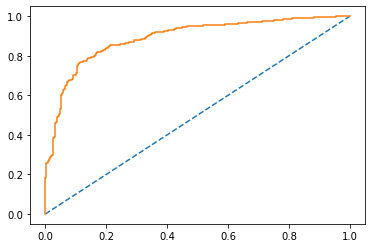

In [125]:
# predict probabilities
probs = log_reg.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Logistic Regression for Train data: %.3f' % log_train_auc)
# calculate roc curve
log_train_fpr, log_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr);

AUC of the Logistic Regression for Test data: 0.877


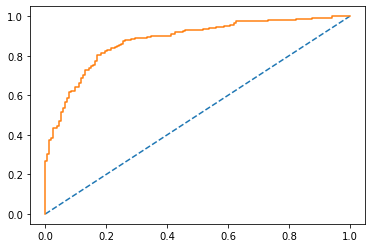

In [126]:
# predict probabilities
probs = log_reg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Logistic Regression for Test data: %.3f' % log_test_auc)
# calculate roc curve
log_test_fpr, log_test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr);

Confusion Matrix of the Logistic Regression for Train data:


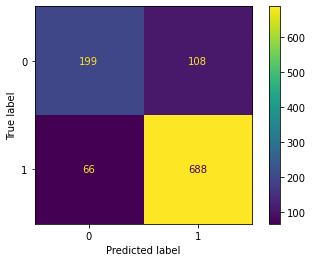

In [127]:
print('Confusion Matrix of the Logistic Regression for Train data:')
plot_confusion_matrix(log_reg,X_train,y_train);

Confusion Matrix of the Logistic Regression for Test data:


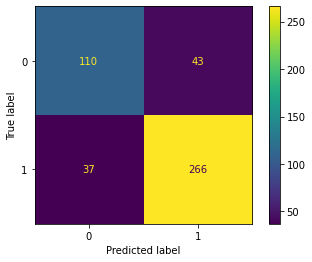

In [128]:
print('Confusion Matrix of the Logistic Regression for Test data:')
plot_confusion_matrix(log_reg,X_test,y_test);

In [129]:
print('Classification Report of the Logistic Regression for Train data:')
print(classification_report(y_train,y_train_log_p))

Classification Report of the Logistic Regression for Train data:
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       307
           1       0.86      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [130]:
print('Classification Report of the Logistic Regression for Test data:')
print(classification_report(y_test,y_test_log_p))

Classification Report of the Logistic Regression for Test data:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [169]:
election1 = election[['age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']]
coef_df = pd.DataFrame(log_reg.coef_, columns= election1.columns)
coef_df['intercept'] = log_reg.intercept_
coef_df

age  economic.cond.national  economic.cond.household     Blair  \
0 -0.01395                0.707359                 0.115391  0.582678   

     Hague    Europe  political.knowledge    gender  intercept  
0 -0.80919 -0.195746            -0.276644  0.334127    1.37743

In [170]:
coef = log_reg.coef_[0].T
coef

array([-0.01394983,  0.7073585 ,  0.11539097,  0.58267771, -0.8091902 ,
       -0.1957464 , -0.27664432,  0.33412668])

In [171]:
print (pd.DataFrame(coef, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                              Imp
economic.cond.national   0.707359
Blair                    0.582678
gender                   0.334127
economic.cond.household  0.115391
age                     -0.013950
Europe                  -0.195746
political.knowledge     -0.276644
Hague                   -0.809190


Text(0.5, 1.0, 'Importance of Features in Logistic Regression')

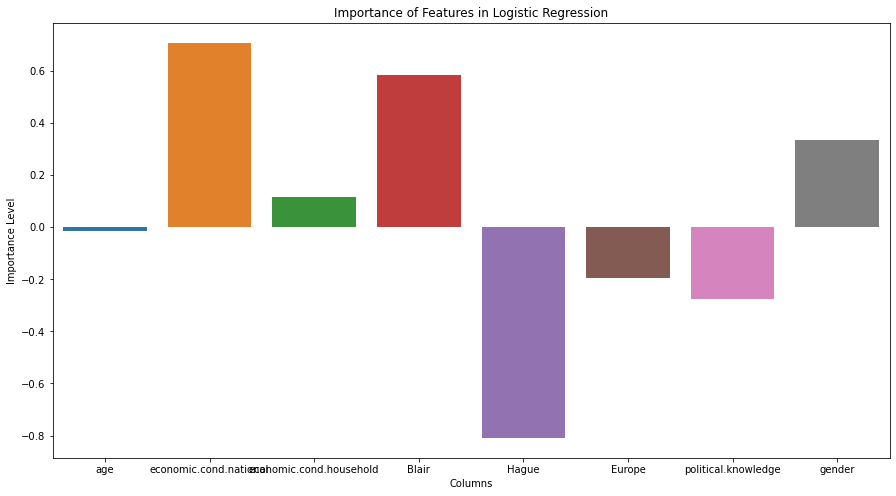

In [172]:
col = X_train.columns
plt.figure(figsize=(15,8))
sns.barplot(x=col, y=coef)
plt.xlabel('Columns')
plt.ylabel('Importance Level')
plt.title('Importance of Features in Logistic Regression')

## GridSearchCV for Logistic Regression model

In [135]:
grid = {
    'penalty':['l2','none'],
    'solver' : ['saga','lbfgs','sag','liblinear','newton-cg'],
    'tol' : [0.0001,0.00001,0.001,0.000001]
}

LogRegmodel1 = LogisticRegression(max_iter=10000,n_jobs=2,random_state=1)
grid_search = GridSearchCV(LogRegmodel1,param_grid=grid,cv=5,n_jobs=-1,scoring='f1')
grid_search.fit(X_train,y_train)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          random_state=1),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['saga', 'lbfgs', 'sag', 'liblinear',
                                    'newton-cg'],
                         'tol': [0.0001, 1e-05, 0.001, 1e-06]},
             scoring='f1')

In [136]:
log_best_model = grid_search.best_estimator_
log_best_model

LogisticRegression(max_iter=10000, n_jobs=2, random_state=1, solver='liblinear')

In [137]:
y_test_p = log_best_model.predict(X_test)
y_train_p = log_best_model.predict(X_train)

Confusion Matrix of the Logistic Regression for Train data:


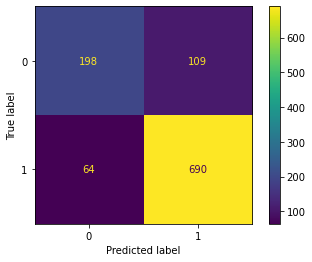

In [138]:
print('Confusion Matrix of the Logistic Regression for Train data:')
plot_confusion_matrix(log_best_model,X_train,y_train);

Confusion Matrix of the Logistic Regression for Train data:


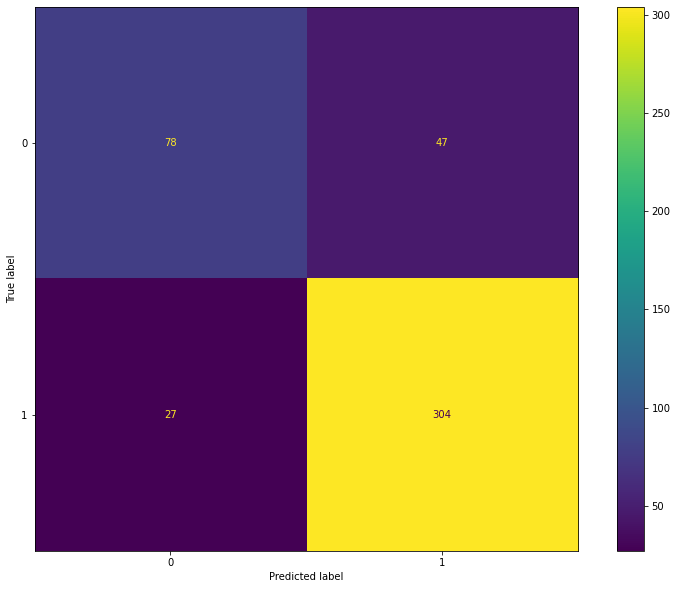

In [474]:
print('Confusion Matrix of the Logistic Regression for Train data:')
plot_confusion_matrix(log_best_model,X_test,y_test);

In [140]:
print('Classification Report of the Logistic Regression for Train data:')
print(classification_report(y_train,y_train_p))

Classification Report of the Logistic Regression for Train data:
              precision    recall  f1-score   support

           0       0.76      0.64      0.70       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [141]:
print('Classification Report of the Logistic Regression for Test data:')
print(classification_report(y_test,y_test_p))

Classification Report of the Logistic Regression for Test data:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC of the Logistic Regression for Train data: 0.890


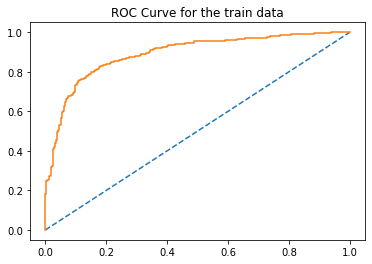

In [142]:
# predict probabilities
probs = log_best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logr_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Logistic Regression for Train data: %.3f' % logr_train_auc)
# calculate roc curve
logr_train_fpr, logr_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logr_train_fpr, logr_train_tpr);
plt.title('ROC Curve for the train data');

AUC of the Logistic Regression for Test data: 0.880


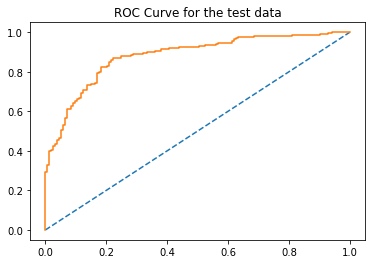

In [143]:
# predict probabilities
probs = log_best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logr_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Logistic Regression for Test data: %.3f' % logr_test_auc)
# calculate roc curve
logr_test_fpr, logr_test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logr_test_fpr, logr_test_tpr);
plt.title('ROC Curve for the test data');

In [144]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
logr_train_acc = round(accuracy_score(y_train,y_train_p),2)
logr_train_recall = round(recall_score(y_train,y_train_p,pos_label=1,average='binary'),2)
logr_train_precision = round(precision_score(y_train,y_train_p,pos_label=1,average='binary'),2)
logr_train_f1score = round(f1_score(y_train,y_train_p,pos_label=1,average='binary'),2)

In [145]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
logr_test_acc = round(accuracy_score(y_test,y_test_p),2)
logr_test_precision = round(precision_score(y_test,y_test_p,pos_label=1,average='binary'),2)
logr_test_recall = round(recall_score(y_test,y_test_p,pos_label=1,average='binary'),2)
logr_test_f1score = round(f1_score(y_test,y_test_p,pos_label=1,average='binary'),2)

In [437]:
print('Accuracy of the Logistic Regression for Train data in GridsearchCV:',logr_train_acc)
print('Accuracy of the Logistic Regression for Test data in GridsearchCV:',logr_test_acc)

Accuracy of the Logistic Regression for Train data in GridsearchCV: 0.84
Accuracy of the Logistic Regression for Test data in GridsearchCV: 0.83


In [146]:
election1 = election[['age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']]
coef_df = pd.DataFrame(log_best_model.coef_, columns= election1.columns)
coef_df['intercept'] = log_best_model.intercept_
coef_df

age  economic.cond.national  economic.cond.household     Blair  \
0 -0.01243                0.666021                 0.092731  0.619922   

      Hague    Europe  political.knowledge    gender  intercept  
0 -0.799436 -0.202637            -0.303647  0.206842   1.485006

In [147]:
coef = log_best_model.coef_[0].T
coef

array([-0.01242972,  0.66602083,  0.09273129,  0.61992227, -0.79943591,
       -0.20263749, -0.30364699,  0.20684228])

In [148]:
print (pd.DataFrame(coef, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                              Imp
economic.cond.national   0.666021
Blair                    0.619922
gender                   0.206842
economic.cond.household  0.092731
age                     -0.012430
Europe                  -0.202637
political.knowledge     -0.303647
Hague                   -0.799436


Text(0.5, 1.0, 'Importance of Features in Logistic Regression')

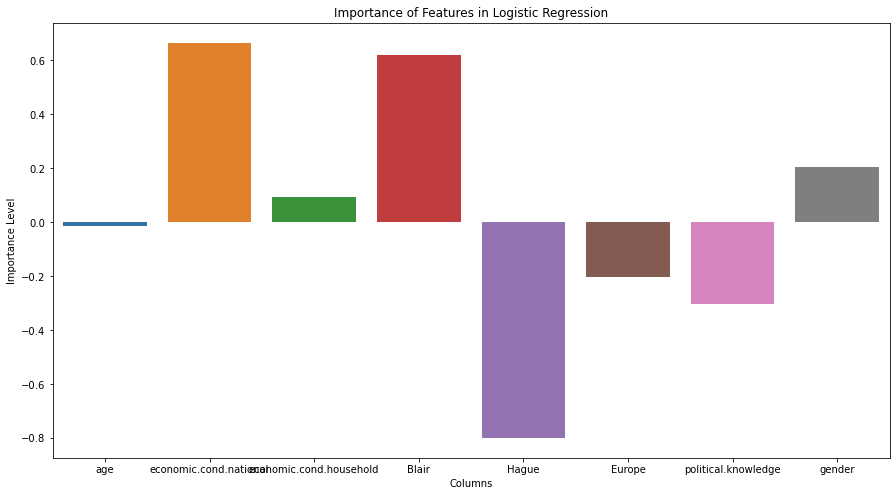

In [149]:
col = X_train.columns
plt.figure(figsize=(15,8))
sns.barplot(x=col, y=coef)
plt.xlabel('Columns')
plt.ylabel('Importance Level')
plt.title('Importance of Features in Logistic Regression')

## Linear Discriminant Analysis

In [152]:
LDAmodel = LinearDiscriminantAnalysis()
LDAmodel.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [153]:
y_test_lda_p = LDAmodel.predict(X_test)
y_train_lda_p = LDAmodel.predict(X_train)

In [154]:
print('Accuracy of Train in LDA model:',LDAmodel.score(X_train,y_train))
print('Accuracy of Test in LDA model:',LDAmodel.score(X_test,y_test))

Accuracy of Train in LDA model: 0.8341187558906692
Accuracy of Test in LDA model: 0.8333333333333334


Confusion Matrix of the LDA for Train data:


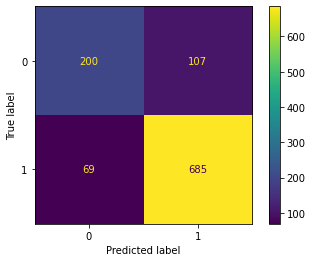

In [155]:
print('Confusion Matrix of the LDA for Train data:')
plot_confusion_matrix(LDAmodel,X_train,y_train);

Confusion Matrix of the LDA for Test data:


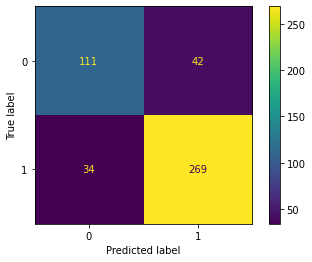

In [156]:
print('Confusion Matrix of the LDA for Test data:')
plot_confusion_matrix(LDAmodel,X_test,y_test);

In [157]:
print('Classification Report of the Linear Discriminant Analysis for Train data:')
print(classification_report(y_train,y_train_lda_p))

Classification Report of the Linear Discriminant Analysis for Train data:
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [158]:
print('Classification Report of the Linear Discriminant Analysis for Test data:')
print(classification_report(y_test,y_test_lda_p))

Classification Report of the Linear Discriminant Analysis for Test data:
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC of the Linear Discriminant Analysis for Train data: 0.889


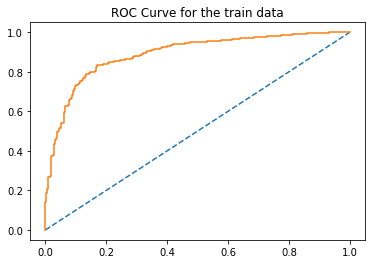

In [159]:
# predict probabilities
probs = LDAmodel.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Linear Discriminant Analysis for Train data: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr);
plt.title('ROC Curve for the train data');

AUC of the Linear Discriminant Analysis for Test data: 0.888


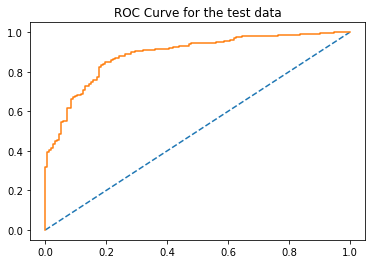

In [160]:

# predict probabilities
probs = LDAmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Linear Discriminant Analysis for Test data: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr);
plt.title('ROC Curve for the test data');

In [161]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
lda_train_acc = round(accuracy_score(y_train,y_train_p),2)
lda_train_recall = round(recall_score(y_train,y_train_p,pos_label=1,average='binary'),2)
lda_train_precision = round(precision_score(y_train,y_train_p,pos_label=1,average='binary'),2)
lda_train_f1score = round(f1_score(y_train,y_train_p,pos_label=1,average='binary'),2)

In [162]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
lda_test_acc = round(accuracy_score(y_test,y_test_p),2)
lda_test_precision = round(precision_score(y_test,y_test_p,pos_label=1,average='binary'),2)
lda_test_recall = round(recall_score(y_test,y_test_p,pos_label=1,average='binary'),2)
lda_test_f1score = round(f1_score(y_test,y_test_p,pos_label=1,average='binary'),2)

## Model Tuning - GridSearchCV for Linear Discriminant Analysis

In [263]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver': ['svd', 'lsqr', 'eigen']
}

lda = LinearDiscriminantAnalysis()

lda_grid_search = GridSearchCV(estimator = lda, param_grid = param_grid, cv = 3)



In [264]:
lda_grid_search.fit(X_train, y_train)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\discriminant_analysis.py", line 464, in fit
    self._solve_svd(X, y)
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\discriminant_analysis.py", line 381, in _solve_svd
  

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen']})

In [265]:
lda_grid_search.best_params_

{'solver': 'lsqr'}

In [266]:
lda_best_model = lda_grid_search.best_estimator_
lda_best_model

LinearDiscriminantAnalysis(solver='lsqr')

In [267]:
y_train_lda_p = lda_best_model.predict(X_train)
y_test_lda_p = lda_best_model.predict(X_test)

In [269]:
## Performance Matrix on train data set
y_train_lda_p = lda_best_model.predict(X_train)
rfcv_train_model_score = lda_best_model.score(X_train, y_train)
print(rfcv_train_model_score)
print(confusion_matrix(y_train, y_train_lda_p))
print(classification_report(y_train, y_train_lda_p))

0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [271]:
## Performance Matrix on test data set
y_test_lda_p = lda_best_model.predict(X_test)
rfcv_test_model_score1 = lda_best_model.score(X_test, y_test)
print(rfcv_test_model_score1)
print(confusion_matrix(y_test, y_test_lda_p))
print(classification_report(y_test, y_test_lda_p))

0.8333333333333334
[[111  42]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC of the Random Forest model for Train data: 0.889


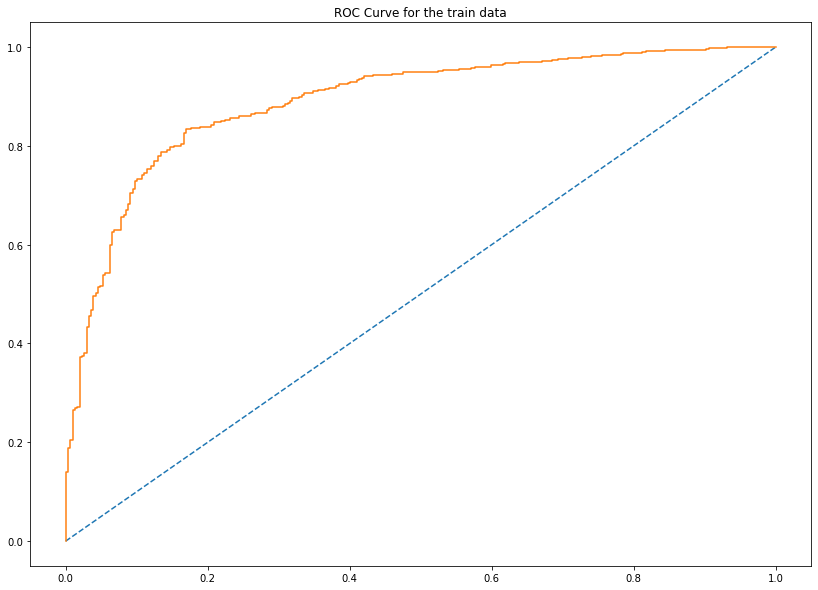

In [272]:
# predict probabilities
probs = lda_best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ldacv_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Random Forest model for Train data: %.3f' % ldacv_train_auc)
# calculate roc curve
ldacv_train_fpr, ldacv_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ldacv_train_fpr, ldacv_train_tpr);
plt.title('ROC Curve for the train data');

AUC of the Random Forest model for Test data: 0.888


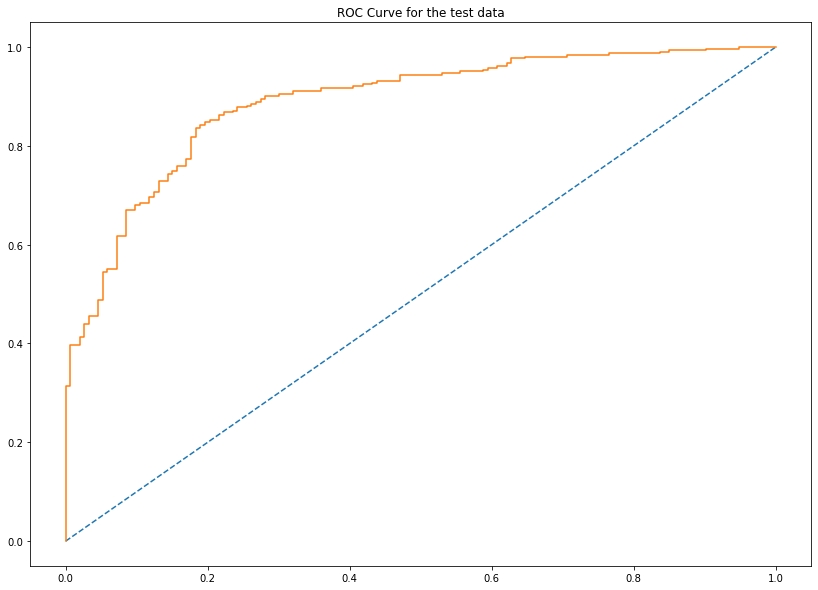

In [273]:
# predict probabilities
probs = lda_best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ldacv_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Random Forest model for Test data: %.3f' % ldacv_test_auc)
# calculate roc curve
ldacv_test_fpr, ldacv_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ldacv_test_fpr, ldacv_test_tpr);
plt.title('ROC Curve for the test data');

In [275]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
ldacv_train_acc = round(accuracy_score(y_train,y_train_lda_p),2)
ldacv_train_recall = round(recall_score(y_train,y_train_lda_p,pos_label=1,average='binary'),2)
ldacv_train_precision = round(precision_score(y_train,y_train_lda_p,pos_label=1,average='binary'),2)
ldacv_train_f1score = round(f1_score(y_train,y_train_lda_p,pos_label=1,average='binary'),2)

In [276]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
ldacv_test_acc = round(accuracy_score(y_test,y_test_lda_p),2)
ldacv_test_precision = round(precision_score(y_test,y_test_lda_p,pos_label=1,average='binary'),2)
ldacv_test_recall = round(recall_score(y_test,y_test_lda_p,pos_label=1,average='binary'),2)
ldacv_test_f1score = round(f1_score(y_test,y_test_lda_p,pos_label=1,average='binary'),2)

In [439]:
print('Accuracy of Train in LDA model in GridsearchCV:',ldacv_train_acc)
print('Accuracy of Test in LDA model in GridsearchCV:',ldacv_test_acc)

Accuracy of Train in LDA model in GridsearchCV: 0.83
Accuracy of Test in LDA model in GridsearchCV: 0.83


In [277]:
df = pd.DataFrame(data = [[logr_train_acc,logr_test_acc,ldacv_train_acc,ldacv_test_acc],
                             [logr_train_auc,logr_test_auc,ldacv_train_auc,ldacv_test_auc], 
                             [logr_train_recall,logr_test_recall,ldacv_train_recall,ldacv_test_recall],
                             [logr_train_precision,logr_test_precision,ldacv_train_precision,ldacv_test_precision],
                             [logr_train_f1score,logr_test_f1score,ldacv_train_f1score,ldacv_test_f1score]],
                   columns=['Logit Train', 'Logit Test', 'LDA Train', 'LDA Test'],
                   index=['Accuracy','AUC Score','Recall','Precision','F1 Score'])
round(df,2)

Logit Train  Logit Test  LDA Train  LDA Test
Accuracy          0.84        0.83       0.83      0.83
AUC Score         0.89        0.88       0.89      0.89
Recall            0.92        0.88       0.91      0.89
Precision         0.86        0.86       0.86      0.86
F1 Score          0.89        0.87       0.89      0.88

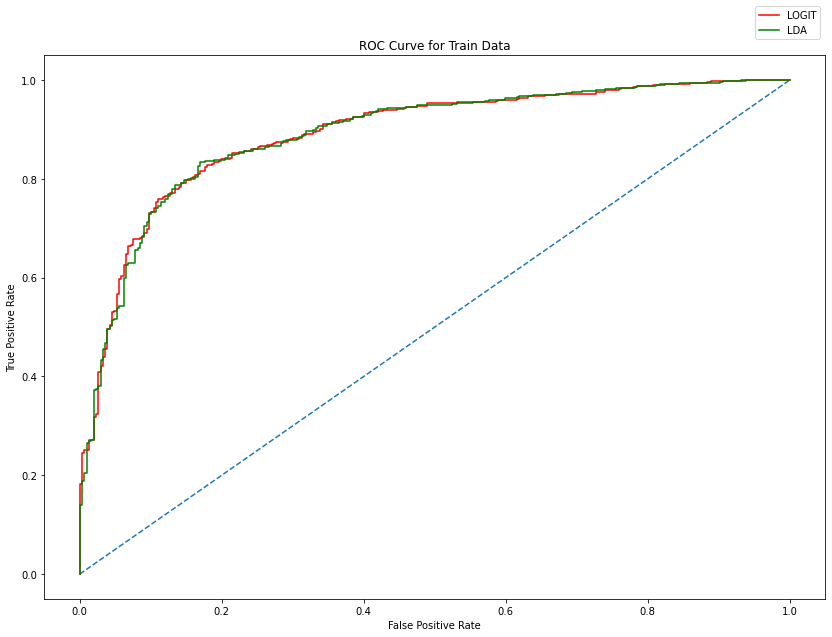

In [278]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logr_train_fpr, logr_train_tpr,color='red',label="LOGIT")
plt.plot(ldacv_train_fpr,ldacv_train_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

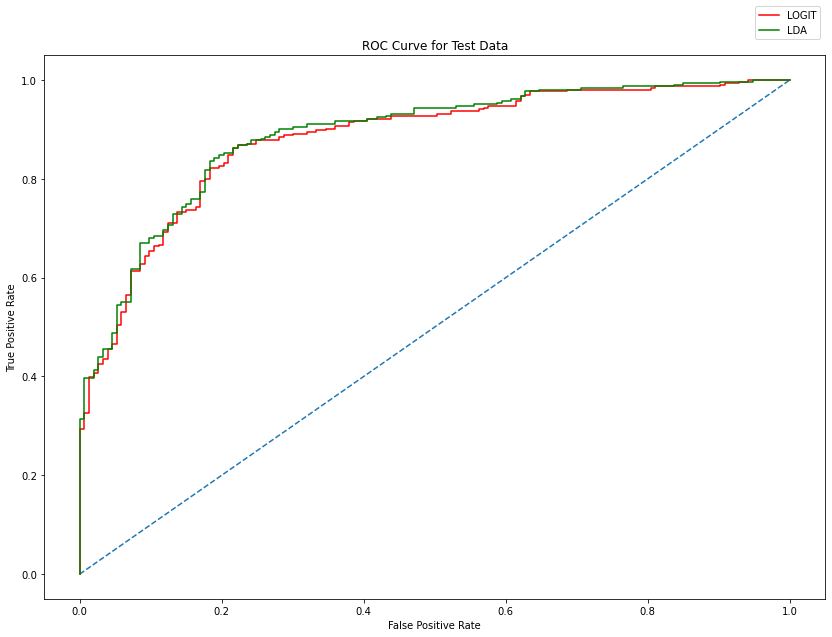

In [279]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logr_test_fpr, logr_test_tpr,color='red',label="LOGIT")
plt.plot(ldacv_test_fpr,ldacv_test_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [173]:
election1 = election[['age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']]
coef_df = pd.DataFrame(LDAmodel.coef_, columns= election1.columns)
coef_df['intercept'] = LDAmodel.intercept_
coef_df

age  economic.cond.national  economic.cond.household   Blair  \
0 -0.020037                 0.60492                 0.050069  0.7424   

      Hague    Europe  political.knowledge   gender  intercept  
0 -0.926634 -0.223612            -0.430335  0.14908   2.627616

In [166]:
coef = LDAmodel.coef_[0].T
coef

array([-0.02003705,  0.60492045,  0.05006905,  0.74240039, -0.92663438,
       -0.22361192, -0.43033484,  0.14907998])

In [167]:
print (pd.DataFrame(coef, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                              Imp
Blair                    0.742400
economic.cond.national   0.604920
gender                   0.149080
economic.cond.household  0.050069
age                     -0.020037
Europe                  -0.223612
political.knowledge     -0.430335
Hague                   -0.926634


Text(0.5, 1.0, 'Importance of Features in Linear Discriminant Analysis')

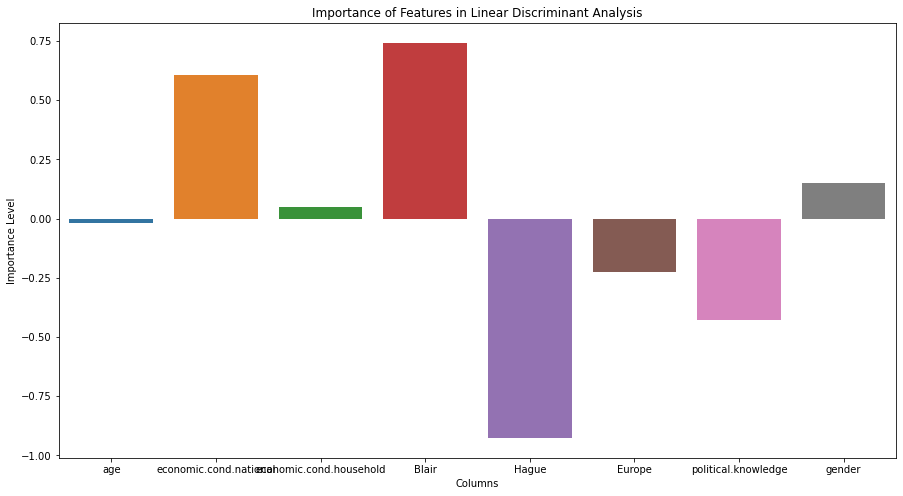

In [168]:
col = X_train.columns
plt.figure(figsize=(15,8))
sns.barplot(x=col, y=coef)
plt.xlabel('Columns')
plt.ylabel('Importance Level')
plt.title('Importance of Features in Linear Discriminant Analysis')

## KNN Model

In [475]:
X = election.drop(['vote'],axis=1)
y = election[['vote']]

In [175]:
#X[['age']]=X[['age']].apply(zscore)

In [476]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [477]:
X_train[['age']]=X_train[['age']].apply(zscore)
X_test[['age']]=X_test[['age']].apply(zscore)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [478]:
knnmodel = KNeighborsClassifier()
knnmodel.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier()

In [484]:
## Performance Matrix on train data set
y_train_knn_predict = knnmodel.predict(X_train)
knn_train_model_score = knnmodel.score(X_train, y_train)
print('Accuracy of Train data in KNN model:',knn_train_model_score)
print('Confusion Matrix of the KNN for Train data:')
print(confusion_matrix(y_train, y_train_knn_predict))
print('Classification Report of the KNN for Train data:')
print(classification_report(y_train, y_train_knn_predict))

Accuracy of Train data in KNN model: 0.8614514608859567
Confusion Matrix of the KNN for Train data:
[[223  84]
 [ 63 691]]
Classification Report of the KNN for Train data:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       307
           1       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.82      0.83      1061
weighted avg       0.86      0.86      0.86      1061



In [485]:
## Performance Matrix on test data set
y_test_knn_predict = knnmodel.predict(X_test)
knn_test_model_score = knnmodel.score(X_test, y_test)
print('Accuracy of Test data in KNN model:',knn_test_model_score)
print('Confusion Matrix of the KNN for Test data:')
print(confusion_matrix(y_test, y_test_knn_predict))
print('Classification Report of the KNN for Test data:')
print(classification_report(y_test, y_test_knn_predict))

Accuracy of Test data in KNN model: 0.8179824561403509
Confusion Matrix of the KNN for Test data:
[[100  53]
 [ 30 273]]
Classification Report of the KNN for Test data:
              precision    recall  f1-score   support

           0       0.77      0.65      0.71       153
           1       0.84      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.81      0.82      0.81       456



Confusion Matrix of the KNN for Train data:


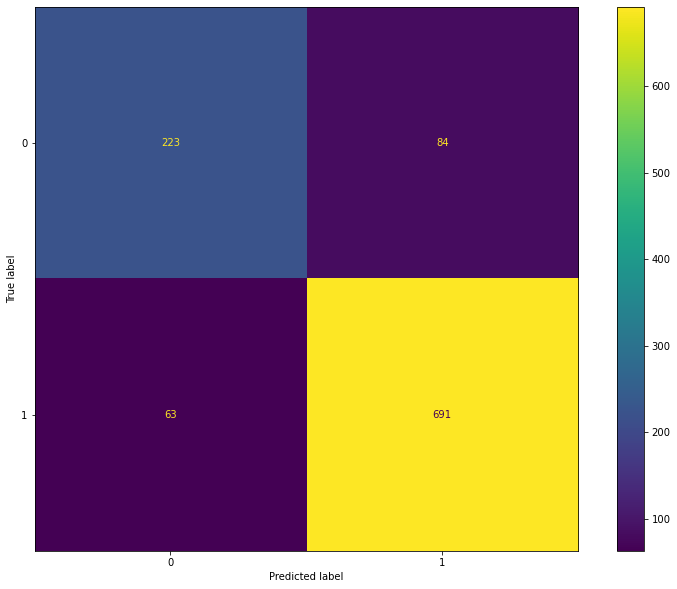

In [479]:
print('Confusion Matrix of the KNN for Train data:')
plot_confusion_matrix(knnmodel,X_train,y_train);

Confusion Matrix of the KNN for Test data:


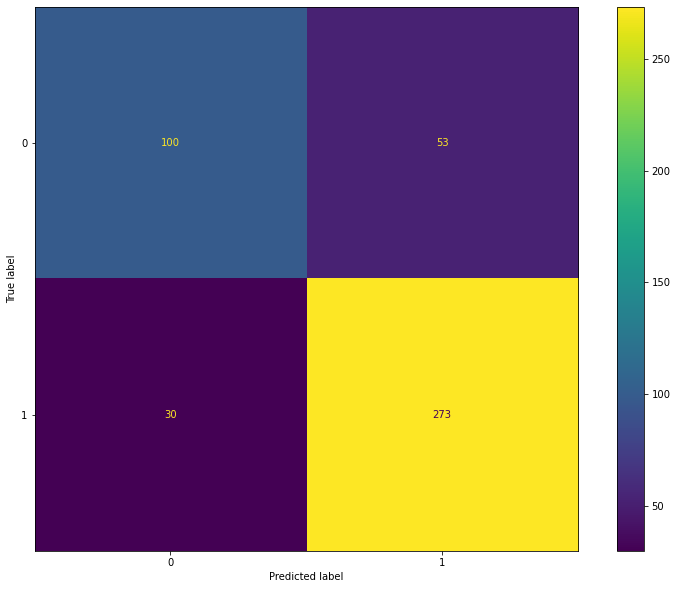

In [480]:
print('Confusion Matrix of the KNN for Test data:')
plot_confusion_matrix(knnmodel,X_test,y_test);

In [192]:
KNN_model=KNeighborsClassifier(n_neighbors=9)
# fit the model
KNN_model.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(n_neighbors=9)

In [193]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8520263901979265
[[213  94]
 [ 63 691]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       307
           1       0.88      0.92      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [194]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score1 = KNN_model.score(X_test, y_test)
print(model_score1)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8267543859649122
[[104  49]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.72       153
           1       0.85      0.90      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456



In [195]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
# fit the model
KNN_model.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(n_neighbors=7)

In [196]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8491988689915174
[[215  92]
 [ 68 686]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [197]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score1 = KNN_model.score(X_test, y_test)
print(model_score1)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8157894736842105
[[101  52]
 [ 32 271]]
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       153
           1       0.84      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.81      0.82      0.81       456



In [198]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was pass

[0.2149122807017544,
 0.17982456140350878,
 0.18201754385964908,
 0.1842105263157895,
 0.17324561403508776,
 0.17105263157894735,
 0.17543859649122806,
 0.17324561403508776,
 0.17105263157894735,
 0.16885964912280704,
 0.16666666666666663,
 0.16228070175438591,
 0.1600877192982456,
 0.1600877192982456,
 0.16228070175438591]

In [247]:
ac_scores

[0.7850877192982456,
 0.8201754385964912,
 0.8179824561403509,
 0.8157894736842105,
 0.8267543859649122,
 0.8289473684210527,
 0.8245614035087719,
 0.8267543859649122,
 0.8289473684210527,
 0.831140350877193,
 0.8333333333333334,
 0.8377192982456141,
 0.8399122807017544,
 0.8399122807017544,
 0.8377192982456141]

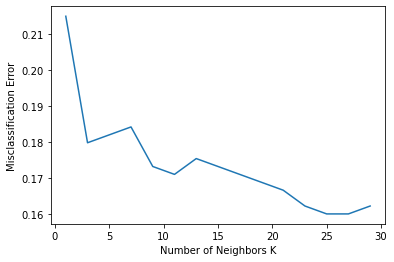

In [199]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,30,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [200]:
knn_best_model = KNeighborsClassifier(n_neighbors=11)
knn_best_model

KNeighborsClassifier(n_neighbors=11)

In [201]:
knn_best_model.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(n_neighbors=11)

In [202]:
y_train_knn_p = knn_best_model.predict(X_train)
y_test_knn_p = knn_best_model.predict(X_test)

In [203]:
## Performance Matrix on train data set
y_train_knn_predict = knn_best_model.predict(X_train)
knn_train_model_score = knn_best_model.score(X_train, y_train)
print(knn_train_model_score)
print(confusion_matrix(y_train, y_train_knn_predict))
print(classification_report(y_train, y_train_knn_predict))

0.8557964184731386
[[217  90]
 [ 63 691]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       307
           1       0.88      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [204]:
## Performance Matrix on test data set
y_test_knn_predict = knn_best_model.predict(X_test)
knn_model_score1 = knn_best_model.score(X_test, y_test)
print(knn_model_score1)
print(confusion_matrix(y_test, y_test_knn_predict))
print(classification_report(y_test, y_test_knn_predict))

0.8289473684210527
[[105  48]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [205]:
knn_best_model = KNeighborsClassifier(n_neighbors=25)
knn_best_model

KNeighborsClassifier(n_neighbors=25)

In [206]:
knn_best_model.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(n_neighbors=25)

In [207]:
y_train_knn_p = knn_best_model.predict(X_train)
y_test_knn_p = knn_best_model.predict(X_test)

In [208]:
## Performance Matrix on train data set
y_train_knn_predict = knn_best_model.predict(X_train)
knn_train_model_score = knn_best_model.score(X_train, y_train)
print(knn_train_model_score)
print(confusion_matrix(y_train, y_train_knn_predict))
print(classification_report(y_train, y_train_knn_predict))

0.8303487276154571
[[206 101]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.72      0.67      0.70       307
           1       0.87      0.90      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [209]:
## Performance Matrix on test data set
y_test_knn_predict = knn_best_model.predict(X_test)
knn_model_score1 = knn_best_model.score(X_test, y_test)
print(knn_model_score1)
print(confusion_matrix(y_test, y_test_knn_predict))
print(classification_report(y_test, y_test_knn_predict))

0.8399122807017544
[[108  45]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       153
           1       0.86      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.81      0.82       456
weighted avg       0.84      0.84      0.84       456



In [214]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'leaf_size': list(range(1,50)),
    'n_neighbors': list(range(1,30)),
    'p': [1,2]
}

knn = KNeighborsClassifier()

knn_grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 3)

In [215]:
knn_grid_search.fit(X_train, y_train)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [216]:
knn_grid_search.best_params_

{'leaf_size': 1, 'n_neighbors': 20, 'p': 1}

In [217]:
knn_best_model = knn_grid_search.best_estimator_
knn_best_model

KNeighborsClassifier(leaf_size=1, n_neighbors=20, p=1)

In [218]:
y_train_knn_p = knn_best_model.predict(X_train)
y_test_knn_p = knn_best_model.predict(X_test)

In [219]:
## Performance Matrix on train data set
y_train_knn_predict = knn_best_model.predict(X_train)
knn_train_model_score = knn_best_model.score(X_train, y_train)
print(knn_train_model_score)
print(confusion_matrix(y_train, y_train_knn_predict))
print(classification_report(y_train, y_train_knn_predict))

0.8435438265786993
[[215  92]
 [ 74 680]]
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [220]:
## Performance Matrix on test data set
y_test_knn_predict = knn_best_model.predict(X_test)
knn_model_score1 = knn_best_model.score(X_test, y_test)
print(knn_model_score1)
print(confusion_matrix(y_test, y_test_knn_predict))
print(classification_report(y_test, y_test_knn_predict))

0.8333333333333334
[[110  43]
 [ 33 270]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



In [235]:
features_train = pd.DataFrame(X_train, columns = election.columns)
features_test = pd.DataFrame(X_test, columns = election.columns)
# Select rooms column for univariate regression example
features_train = features_train.iloc[:, 1]
features_test = features_test.iloc[:, 1]

labels_train = pd.DataFrame(y_train, columns = ['vote'])
labels_test = pd.DataFrame(y_test, columns = ['vote'])

In [241]:
np.sqrt(features_train.shape[0])

32.57299494980466

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A

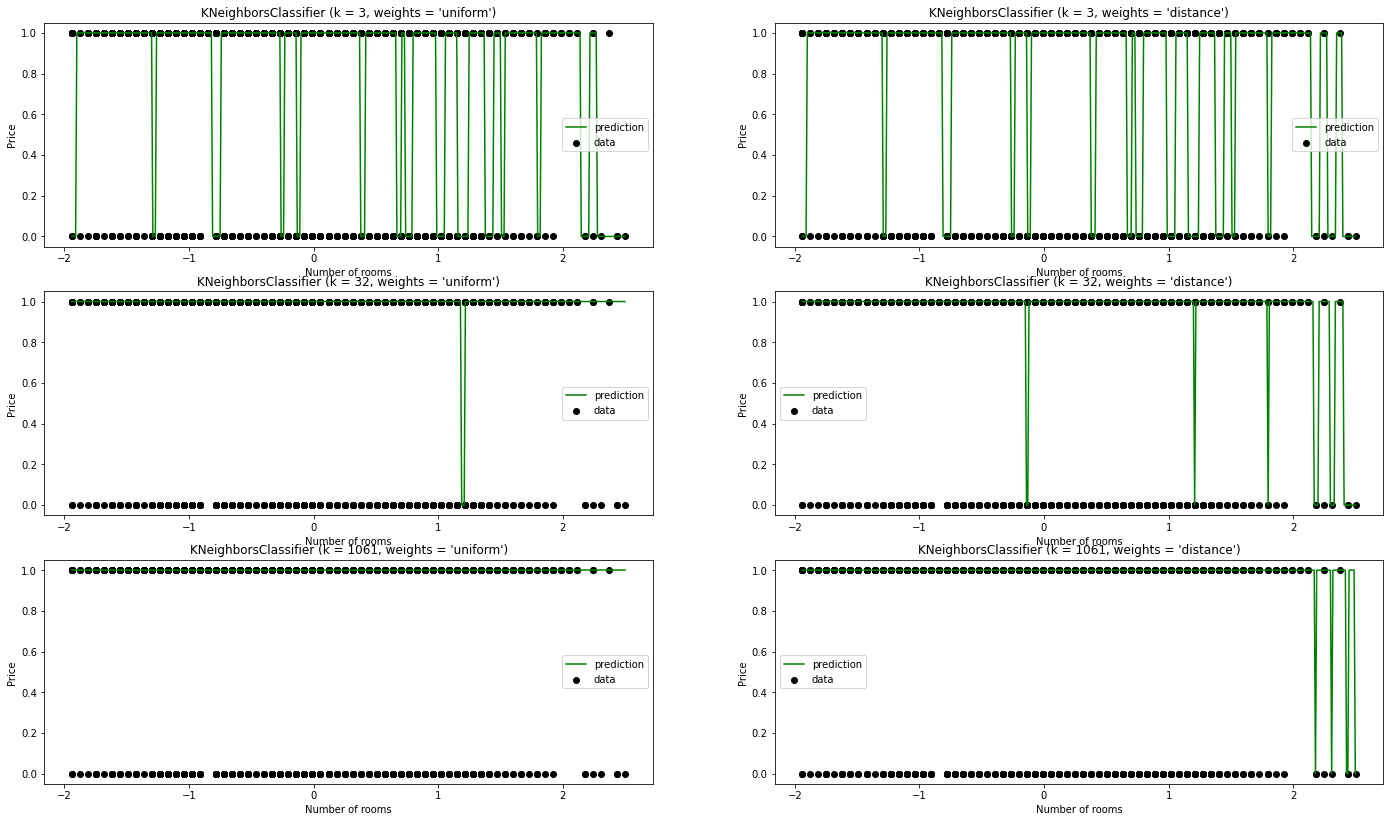

In [238]:
n = features_train.shape[0]
params = [{'weights': 'uniform', 'n_neighbors': 3},
          {'weights': 'distance', 'n_neighbors': 3},
          {'weights': 'uniform', 'n_neighbors': np.sqrt(n).astype(int)},
          {'weights': 'distance', 'n_neighbors': np.sqrt(n).astype(int)},
          {'weights': 'uniform', 'n_neighbors': n},
          {'weights': 'distance', 'n_neighbors': n}]

plot_range = np.arange(min(features_train), max(features_train), 0.01)

for i, param in enumerate(params):
    model = KNeighborsClassifier(**params[i])
    model.fit(features_train.values.reshape(-1, 1), labels_train)

    pred = model.predict(plot_range.reshape(-1, 1))
    # Sort values for plotting
    new_X, new_y = zip(*sorted(zip(plot_range.reshape(-1, 1), pred))) 
    plt.subplot(3, 2, i + 1)
    plt.scatter(features_train.values.reshape(-1, 1), labels_train, c='k', label='data')
    plt.plot(new_X, new_y, c='g', label='prediction')    
    plt.legend()
    plt.title("KNeighborsClassifier (k = %i, weights = '%s')" % (params[i]['n_neighbors'], params[i]['weights']))
    plt.ylabel('Price')
    plt.xlabel('Number of rooms')

plt.rcParams["figure.figsize"] = [14, 10]
    
plt.show()

AUC of the KNN model for Train data: 0.905


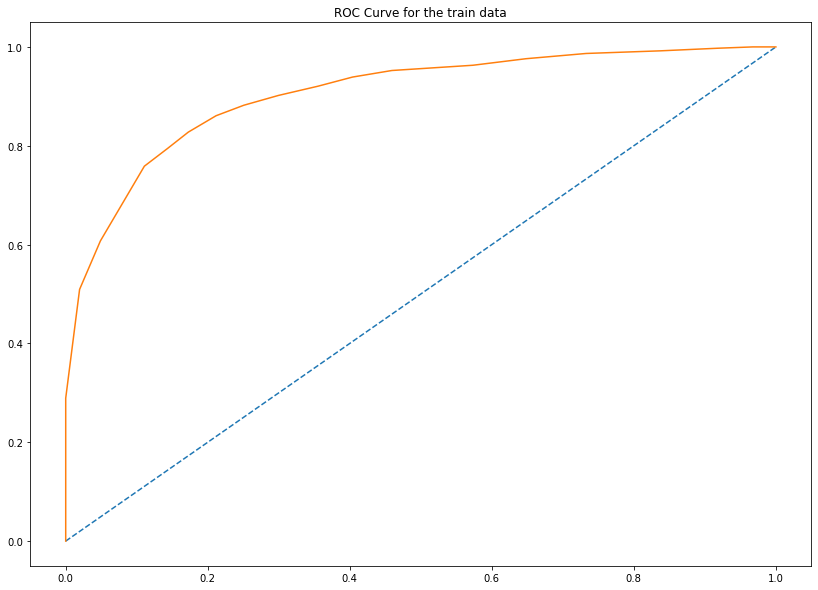

<Figure size 864x576 with 0 Axes>

In [261]:
# predict probabilities
probs = knn_best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train, probs)
print('AUC of the KNN model for Train data: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr);
plt.title('ROC Curve for the train data');
plt.figure(figsize=(12,8))
plt.show()

AUC of the KNN model for Test data: 0.895


<Figure size 576x576 with 0 Axes>

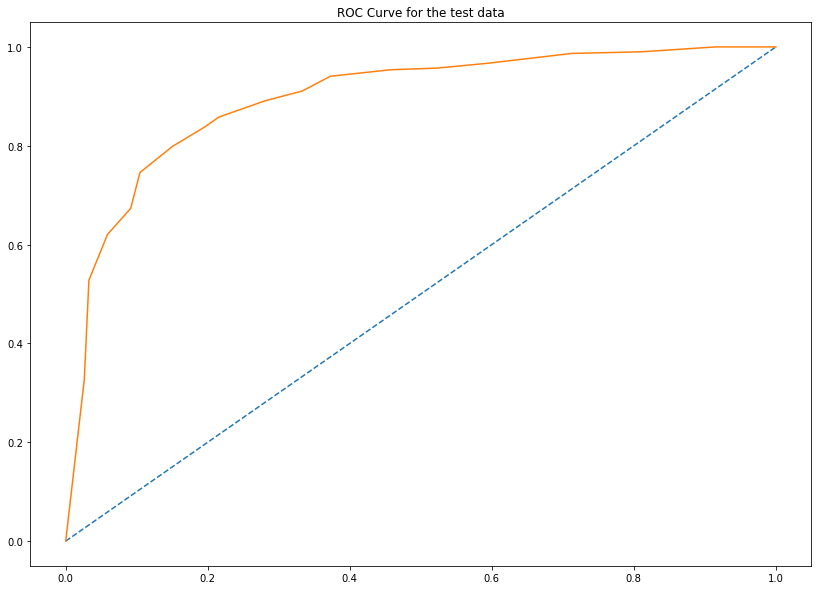

<Figure size 576x576 with 0 Axes>

In [262]:
# predict probabilities
probs = knn_best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs)
print('AUC of the KNN model for Test data: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr);
plt.title('ROC Curve for the test data');
plt.figure(figsize=(8,8))

In [245]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
knn_train_acc = round(accuracy_score(y_train,y_train_knn_predict),2)
knn_train_recall = round(recall_score(y_train,y_train_knn_predict,pos_label=1,average='binary'),2)
knn_train_precision = round(precision_score(y_train,y_train_knn_predict,pos_label=1,average='binary'),2)
knn_train_f1score = round(f1_score(y_train,y_train_knn_predict,pos_label=1,average='binary'),2)

In [246]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
knn_test_acc = round(accuracy_score(y_test,y_test_knn_predict),2)
knn_test_precision = round(precision_score(y_test,y_test_knn_predict,pos_label=1,average='binary'),2)
knn_test_recall = round(recall_score(y_test,y_test_knn_predict,pos_label=1,average='binary'),2)
knn_test_f1score = round(f1_score(y_test,y_test_knn_predict,pos_label=1,average='binary'),2)

In [440]:
print('Accuracy of the Train data in KNN Model using GridsearcCV: ',knn_train_acc)
print('Accuracy of the Test data in KNN Model using GridsearcCV: ',knn_test_acc)

Accuracy of the Train data in KNN Model using GridsearcCV:  0.84
Accuracy of the Test data in KNN Model using GridsearcCV:  0.83


## **Gaussian Naive Bayes**

In [442]:
X = election.drop('vote',axis=1)
y = election['vote']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [443]:
gnbmodel = GaussianNB()
gnbmodel.fit(X_train,y_train)

GaussianNB()

In [486]:
## Performance Matrix on train data set
y_train_gnb_predict = gnbmodel.predict(X_train)
gnb_train_model_score = gnbmodel.score(X_train, y_train)
print('Accuracy of the Train data in Gradient Naive Bayes:',gnb_train_model_score)
print('Confusion matrix for Train data in Gradient Naive Bayes:')
print(confusion_matrix(y_train, y_train_gnb_predict))
print('Classification Report for Train data in Gradient Naive Bayes:')
print(classification_report(y_train, y_train_gnb_predict))

Accuracy of the Train data in Gradient Naive Bayes: 0.822808671065033
Confusion matrix for Train data in Gradient Naive Bayes:
[[173 134]
 [ 54 700]]
Classification Report for Train data in Gradient Naive Bayes:
              precision    recall  f1-score   support

           0       0.76      0.56      0.65       307
           1       0.84      0.93      0.88       754

    accuracy                           0.82      1061
   macro avg       0.80      0.75      0.76      1061
weighted avg       0.82      0.82      0.81      1061



In [487]:
## Performance Matrix on test data set
y_test_gnb_predict = gnbmodel.predict(X_test)
gnb_test_model_score1 = gnbmodel.score(X_test, y_test)
print('Accuracy of the Test data in Gradient Naive Bayes:',gnb_test_model_score1)
print('Confusion matrix for Test data in Gradient Naive Bayes:')
print(confusion_matrix(y_test, y_test_gnb_predict))
print('Classification Report for Test data in Gradient Naive Bayes:')
print(classification_report(y_test, y_test_gnb_predict))

Accuracy of the Test data in Gradient Naive Bayes: 0.8114035087719298
Confusion matrix for Test data in Gradient Naive Bayes:
[[ 99  54]
 [ 32 271]]
Classification Report for Test data in Gradient Naive Bayes:
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       153
           1       0.83      0.89      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



AUC of the Gaussian Naive Bayes model for Train data: 0.888


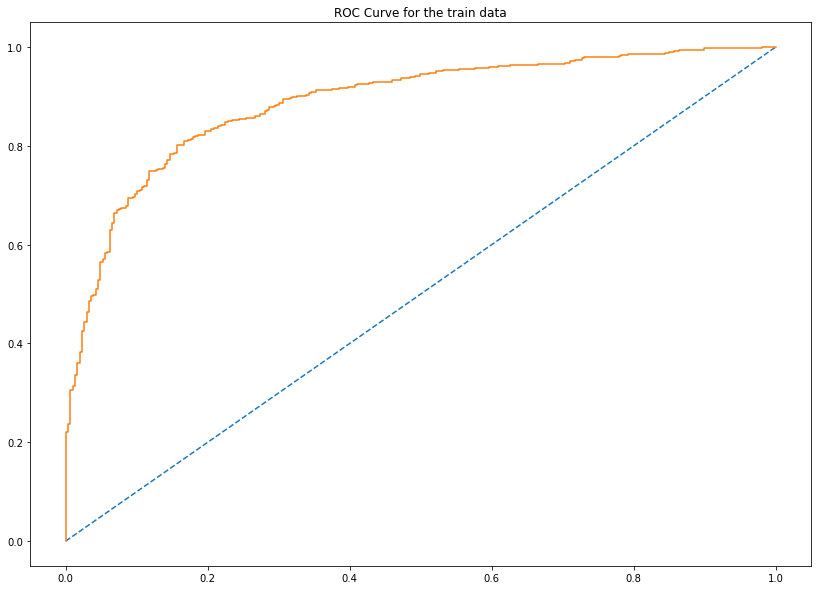

In [284]:
# predict probabilities
probs = gnbmodel.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gnb_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Gaussian Naive Bayes model for Train data: %.3f' % gnb_train_auc)
# calculate roc curve
gnb_train_fpr, gnb_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gnb_train_fpr, gnb_train_tpr);
plt.title('ROC Curve for the train data');

AUC of the Gaussian Naive Bayes model for Test data: 0.876


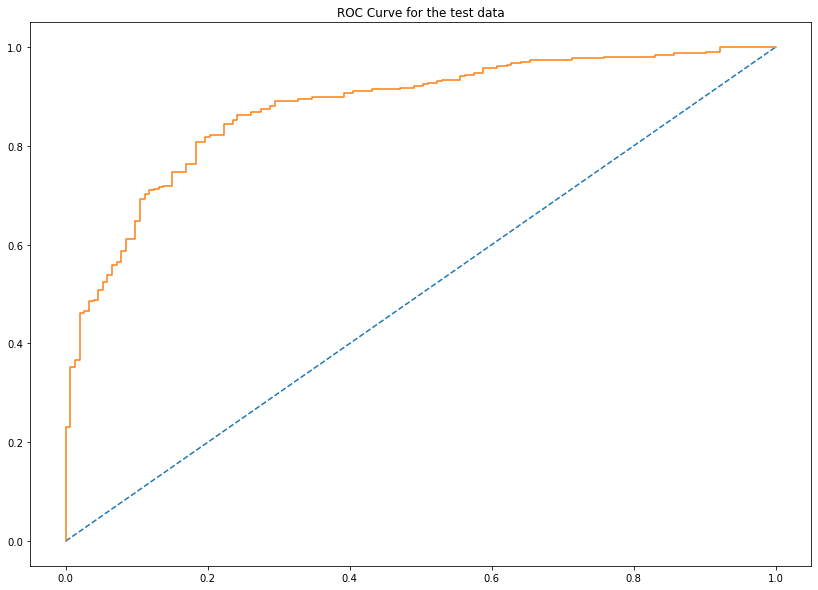

In [285]:
# predict probabilities
probs = gnbmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gnb_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Gaussian Naive Bayes model for Test data: %.3f' % gnb_test_auc)
# calculate roc curve
gnb_test_fpr, gnb_test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gnb_test_fpr, gnb_test_tpr);
plt.title('ROC Curve for the test data');

In [286]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
gnb_train_acc = round(accuracy_score(y_train,y_train_gnb_predict),2)
gnb_train_recall = round(recall_score(y_train,y_train_gnb_predict,pos_label=1,average='binary'),2)
gnb_train_precision = round(precision_score(y_train,y_train_gnb_predict,pos_label=1,average='binary'),2)
gnb_train_f1score = round(f1_score(y_train,y_train_gnb_predict,pos_label=1,average='binary'),2)

In [287]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
gnb_test_acc = round(accuracy_score(y_test,y_test_gnb_predict),2)
gnb_test_precision = round(precision_score(y_test,y_test_gnb_predict,pos_label=1,average='binary'),2)
gnb_test_recall = round(recall_score(y_test,y_test_gnb_predict,pos_label=1,average='binary'),2)
gnb_test_f1score = round(f1_score(y_test,y_test_gnb_predict,pos_label=1,average='binary'),2)

In [289]:
from sklearn.naive_bayes import GaussianNB

np.random.seed(999)

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=3,
                     verbose=1, 
                     scoring='accuracy')

In [290]:
gs_NB.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.3s finished


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [291]:
gs_NB.best_params_

{'var_smoothing': 0.0006579332246575676}

In [292]:
gs_NB.best_score_

0.8331652822458028

In [293]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

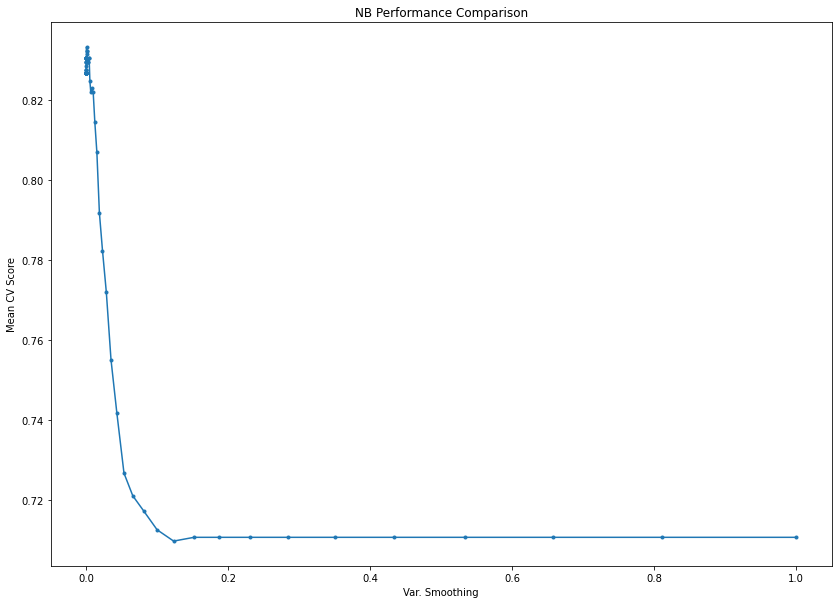

<Figure size 576x576 with 0 Axes>

In [295]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.figure(figsize=(8,8))
plt.show()

In [426]:
gnbcv_best_model = gs_NB.best_estimator_
gnbcv_best_model

GaussianNB(var_smoothing=0.0006579332246575676)

In [427]:
## Performance Matrix on train data set
y_train_gnb_predict = gnbcv_best_model.predict(X_train)
gnb_train_model_score = gnbcv_best_model.score(X_train, y_train)
print(gnb_train_model_score)
print(confusion_matrix(y_train, y_train_gnb_predict))
print(classification_report(y_train, y_train_gnb_predict))

0.8284637134778511
[[233 102]
 [ 80 646]]
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       335
           1       0.86      0.89      0.88       726

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [428]:
## Performance Matrix on test data set
y_test_gnb_predict = gnbcv_best_model.predict(X_test)
gnb_test_model_score1 = gnbcv_best_model.score(X_test, y_test)
print(gnb_test_model_score1)
print(confusion_matrix(y_test, y_test_gnb_predict))
print(classification_report(y_test, y_test_gnb_predict))

0.8508771929824561
[[ 87  38]
 [ 30 301]]
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       125
           1       0.89      0.91      0.90       331

    accuracy                           0.85       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.85      0.85      0.85       456



AUC of the Gaussian Naive Bayes model for Train data: 0.880


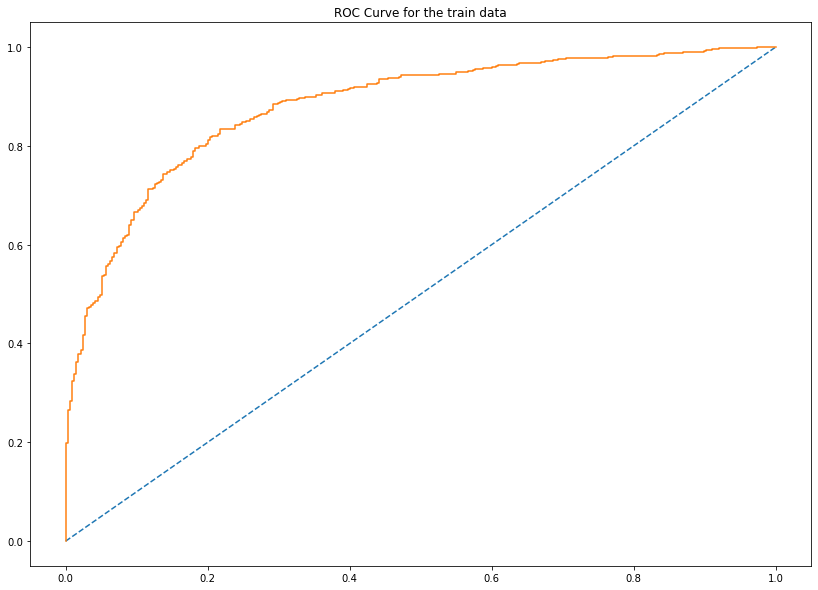

In [429]:
# predict probabilities
probs = gnbcv_best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gnb_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Gaussian Naive Bayes model for Train data: %.3f' % gnb_train_auc)
# calculate roc curve
gnb_train_fpr, gnb_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gnb_train_fpr, gnb_train_tpr);
plt.title('ROC Curve for the train data');

AUC of the Gaussian Naive Bayes model for Test data: 0.895


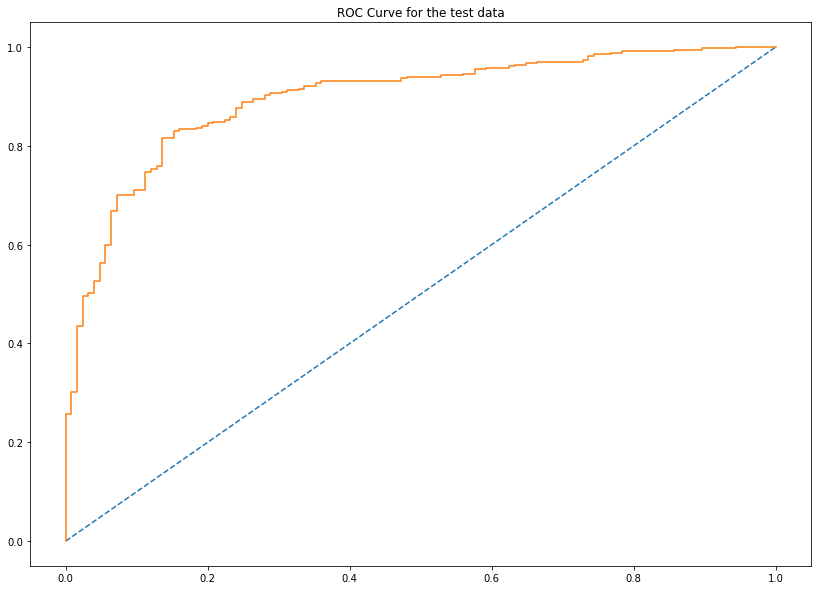

In [430]:
# predict probabilities
probs = gnbcv_best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gnb_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Gaussian Naive Bayes model for Test data: %.3f' % gnb_test_auc)
# calculate roc curve
gnb_test_fpr, gnb_test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gnb_test_fpr, gnb_test_tpr);
plt.title('ROC Curve for the test data');

In [431]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
gnbcv_train_acc = round(accuracy_score(y_train,y_train_gnb_predict),2)
gnbcv_train_recall = round(recall_score(y_train,y_train_gnb_predict,pos_label=1,average='binary'),2)
gnbcv_train_precision = round(precision_score(y_train,y_train_gnb_predict,pos_label=1,average='binary'),2)
gnbcv_train_f1score = round(f1_score(y_train,y_train_gnb_predict,pos_label=1,average='binary'),2)

In [432]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
gnbcv_test_acc = round(accuracy_score(y_test,y_test_gnb_predict),2)
gnbcv_test_precision = round(precision_score(y_test,y_test_gnb_predict,pos_label=1,average='binary'),2)
gnbcv_test_recall = round(recall_score(y_test,y_test_gnb_predict,pos_label=1,average='binary'),2)
gnbcv_test_f1score = round(f1_score(y_test,y_test_gnb_predict,pos_label=1,average='binary'),2)

In [446]:
print('Accuracy of the Train data in Gradient Naive Bayes using GridsearchCV:',gnbcv_train_acc)
print('Accuracy of the Train data in Gradient Naive Bayes using GridsearchCV:',gnbcv_test_acc)

Accuracy of the Train data in Gradient Naive Bayes using GridsearchCV: 0.83
Accuracy of the Train data in Gradient Naive Bayes using GridsearchCV: 0.85


In [433]:
df = pd.DataFrame(data = [[knn_train_acc,knn_test_acc,gnbcv_train_acc,gnbcv_test_acc],
                             [knn_train_auc,knn_test_auc,gnb_train_auc,gnb_test_auc], 
                             [knn_train_recall,knn_test_recall,gnb_train_recall,gnb_test_recall],
                             [knn_train_precision,knn_test_precision,gnb_train_precision,gnb_test_precision],
                             [knn_train_f1score,knn_test_f1score,gnb_train_f1score,gnb_test_f1score]],
                   columns=['KNN Train', 'KNN Test', 'Gaussian NB Train', 'Gaussian NB Test'],
                   index=['Accuracy','AUC Score','Recall','Precision','F1 Score'])
round(df,2)

KNN Train  KNN Test  Gaussian NB Train  Gaussian NB Test
Accuracy        0.84      0.83               0.83              0.85
AUC Score       0.90      0.90               0.88              0.90
Recall          0.90      0.89               0.90              0.87
Precision       0.88      0.86               0.88              0.87
F1 Score        0.89      0.88               0.89              0.87

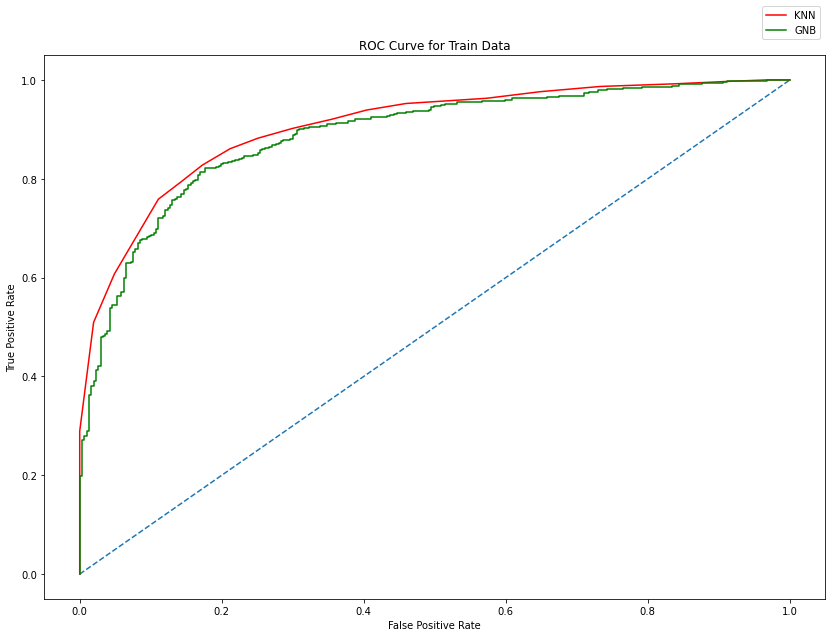

In [302]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(knn_train_fpr, knn_train_tpr,color='red',label="KNN")
plt.plot(gnb_train_fpr,gnb_train_tpr,color='green',label="GNB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

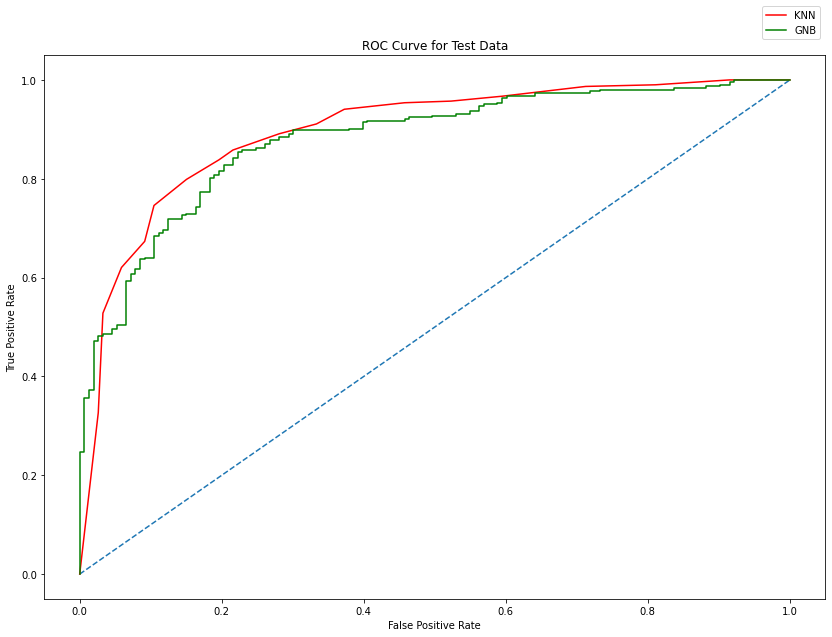

In [303]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(knn_test_fpr, knn_test_tpr,color='red',label="KNN")
plt.plot(gnb_test_fpr,gnb_test_tpr,color='green',label="GNB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## Random Forest

In [304]:
rf = RandomForestClassifier(n_estimators=301,max_features = 7,oob_score= True, random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(max_features=7, n_estimators=301, oob_score=True,
                       random_state=1)

In [305]:
y_train_rf_predict = rf.predict(X_train)
y_test_rf_predict = rf.predict(X_test)

In [447]:
## Performance Matrix on train data set
y_train_rf_predict = rf.predict(X_train)
rf_train_model_score = rf.score(X_train, y_train)
print('Accuracy of the Train data in Random Forest model :',rf_train_model_score)
print(confusion_matrix(y_train, y_train_rf_predict))
print(classification_report(y_train, y_train_rf_predict))

Accuracy of the Train data in Random Forest model : 1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [448]:
## Performance Matrix on test data set
y_test_rf_predict = rf.predict(X_test)
rf_test_model_score1 = rf.score(X_test, y_test)
print('Accuracy of the Train data in Random Forest model :',rf_test_model_score1)
print(confusion_matrix(y_test, y_test_rf_predict))
print(classification_report(y_test, y_test_rf_predict))

Accuracy of the Train data in Random Forest model : 0.8289473684210527
[[109  44]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       153
           1       0.86      0.89      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



AUC of the Random Forest model for Train data: 1.000


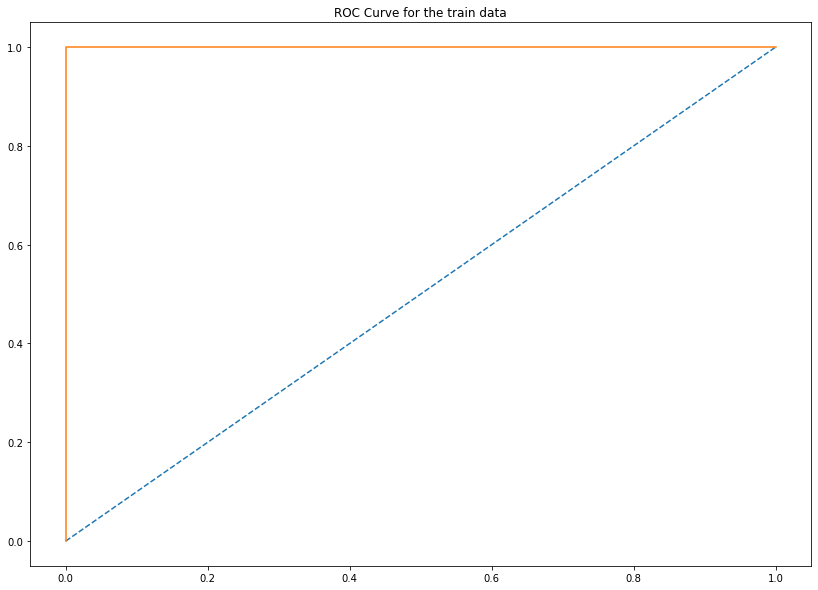

In [308]:
# predict probabilities
probs = rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Random Forest model for Train data: %.3f' % rf_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr);
plt.title('ROC Curve for the train data');

AUC of the Random Forest model for Test data: 0.884


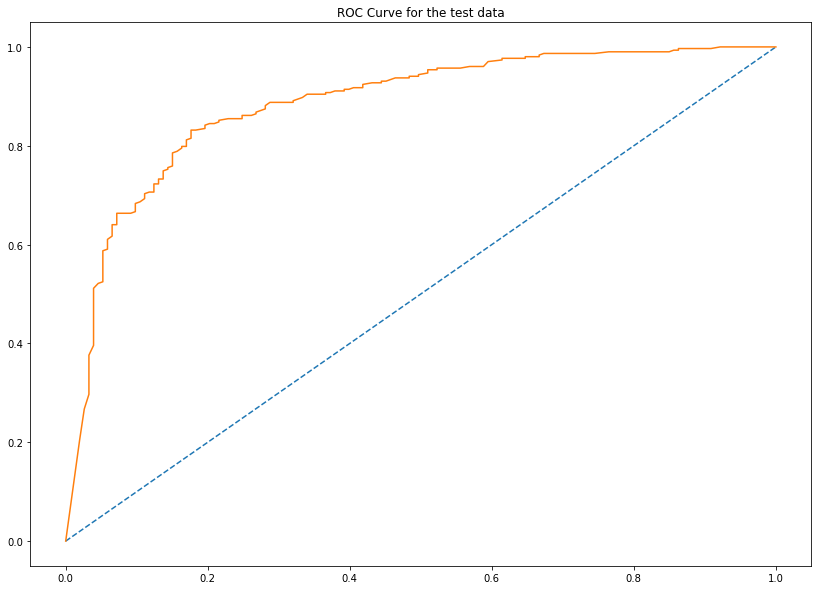

In [309]:
# predict probabilities
probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Random Forest model for Test data: %.3f' % rf_test_auc)
# calculate roc curve
rf_test_fpr, rf_test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr);
plt.title('ROC Curve for the test data');

## Model Tuning - GridSearchCV for RandomForest

In [310]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [8, 9, 10, 11, 12, 13],
    'max_features': [5, 6, 7],
    'min_samples_leaf': [15, 18, 20],
    'min_samples_split': [45, 50, 60],
    'n_estimators': [101, 301]
}

rfcl = RandomForestClassifier()

rf_grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)



In [311]:
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10, 11, 12, 13],
                         'max_features': [5, 6, 7],
                         'min_samples_leaf': [15, 18, 20],
                         'min_samples_split': [45, 50, 60],
                         'n_estimators': [101, 301]})

In [312]:
rf_grid_search.best_params_

{'max_depth': 8,
 'max_features': 5,
 'min_samples_leaf': 18,
 'min_samples_split': 45,
 'n_estimators': 101}

In [313]:
rf_best_model = rf_grid_search.best_estimator_
rf_best_model

RandomForestClassifier(max_depth=8, max_features=5, min_samples_leaf=18,
                       min_samples_split=45, n_estimators=101)

In [314]:
y_train_rf_p = rf_best_model.predict(X_train)
y_test_rf_p = rf_best_model.predict(X_test)

In [315]:
## Performance Matrix on train data set
y_train_rf_p = rf_best_model.predict(X_train)
rfcv_train_model_score = rf_best_model.score(X_train, y_train)
print(rfcv_train_model_score)
print(confusion_matrix(y_train, y_train_rf_p))
print(classification_report(y_train, y_train_rf_p))

0.8510838831291234
[[212  95]
 [ 63 691]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       307
           1       0.88      0.92      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [316]:
## Performance Matrix on test data set
y_test_rf_p = rf_best_model.predict(X_test)
rfcv_test_model_score1 = rf_best_model.score(X_test, y_test)
print(rfcv_test_model_score1)
print(confusion_matrix(y_test, y_test_rf_p))
print(classification_report(y_test, y_test_rf_p))

0.8267543859649122
[[102  51]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       153
           1       0.84      0.91      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456



AUC of the Random Forest model for Train data: 0.912


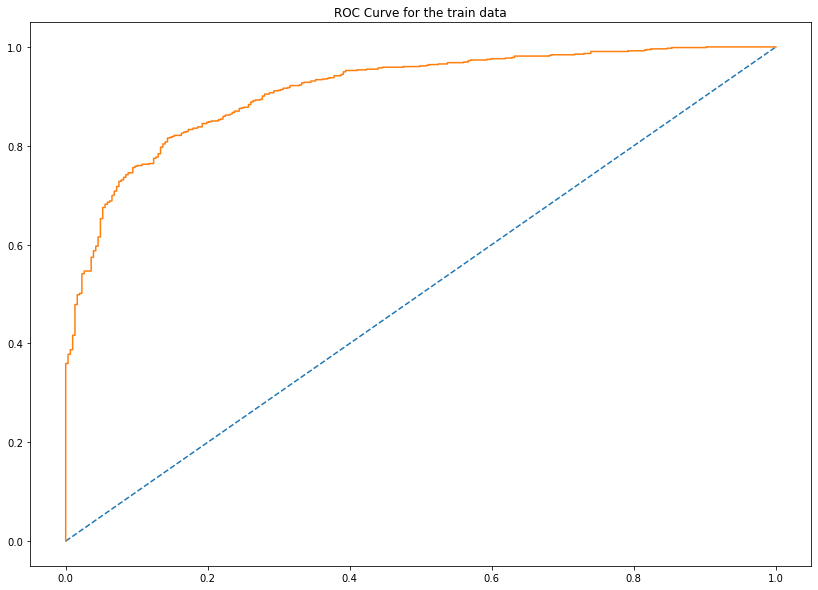

In [317]:
# predict probabilities
probs = rf_best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rfcv_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Random Forest model for Train data: %.3f' % rfcv_train_auc)
# calculate roc curve
rfcv_train_fpr, rfcv_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcv_train_fpr, rfcv_train_tpr);
plt.title('ROC Curve for the train data');

AUC of the Random Forest model for Test data: 0.889


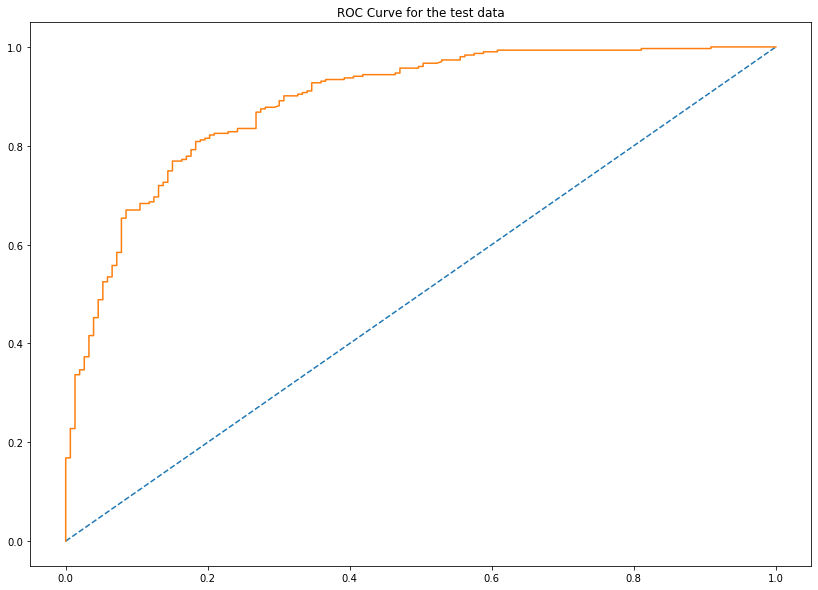

In [318]:
# predict probabilities
probs = rf_best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rfcv_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Random Forest model for Test data: %.3f' % rfcv_test_auc)
# calculate roc curve
rfcv_test_fpr, rfcv_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcv_test_fpr, rfcv_test_tpr);
plt.title('ROC Curve for the test data');

In [319]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
rfcv_train_acc = round(accuracy_score(y_train,y_train_rf_p),2)
rfcv_train_recall = round(recall_score(y_train,y_train_rf_p,pos_label=1,average='binary'),2)
rfcv_train_precision = round(precision_score(y_train,y_train_rf_p,pos_label=1,average='binary'),2)
rfcv_train_f1score = round(f1_score(y_train,y_train_rf_p,pos_label=1,average='binary'),2)

In [320]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
rfcv_test_acc = round(accuracy_score(y_test,y_test_rf_p),2)
rfcv_test_precision = round(precision_score(y_test,y_test_rf_p,pos_label=1,average='binary'),2)
rfcv_test_recall = round(recall_score(y_test,y_test_rf_p,pos_label=1,average='binary'),2)
rfcv_test_f1score = round(f1_score(y_test,y_test_rf_p,pos_label=1,average='binary'),2)

In [449]:
print('Accuracy of the Train data in Random Forest using GridsearchCV:',rfcv_train_acc)
print('Accuracy of the Train data in Random Forest using GridsearchCV:',rfcv_test_acc)

Accuracy of the Train data in Random Forest using GridsearchCV: 0.85
Accuracy of the Train data in Random Forest using GridsearchCV: 0.83


## Ensemble Learning - Bagging

In [451]:
X = election.drop('vote',axis=1)
y = election['vote']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [452]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [453]:
y_test_bag_predict = bagging.predict(X_test)
y_train_bag_predict = bagging.predict(X_train)

In [454]:
## Performance Matrix on train data set
y_train_bag_predict = bagging.predict(X_train)
bag_train_model_score = bagging.score(X_train, y_train)
print(bag_train_model_score)
print('Accuracy of the Train data in Bagging:',bag_train_model_score)
print(confusion_matrix(y_train, y_train_bag_predict))
print(classification_report(y_train, y_train_bag_predict))

0.9868049010367578
Accuracy of the Train data in Bagging: 0.9868049010367578
[[300   7]
 [  7 747]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       307
           1       0.99      0.99      0.99       754

    accuracy                           0.99      1061
   macro avg       0.98      0.98      0.98      1061
weighted avg       0.99      0.99      0.99      1061



In [456]:
## Performance Matrix on test data set
y_test_bag_predict = bagging.predict(X_test)
bag_test_model_score1 = bagging.score(X_test, y_test)
print(bag_test_model_score1)
print('Accuracy of the Test data in Bagging:',bag_test_model_score1)
print(confusion_matrix(y_test, y_test_bag_predict))
print(classification_report(y_test, y_test_bag_predict))

0.7982456140350878
Accuracy of the Test data in Bagging: 0.7982456140350878
[[105  48]
 [ 44 259]]
              precision    recall  f1-score   support

           0       0.70      0.69      0.70       153
           1       0.84      0.85      0.85       303

    accuracy                           0.80       456
   macro avg       0.77      0.77      0.77       456
weighted avg       0.80      0.80      0.80       456



AUC of the Bagging model for Train data: 0.999


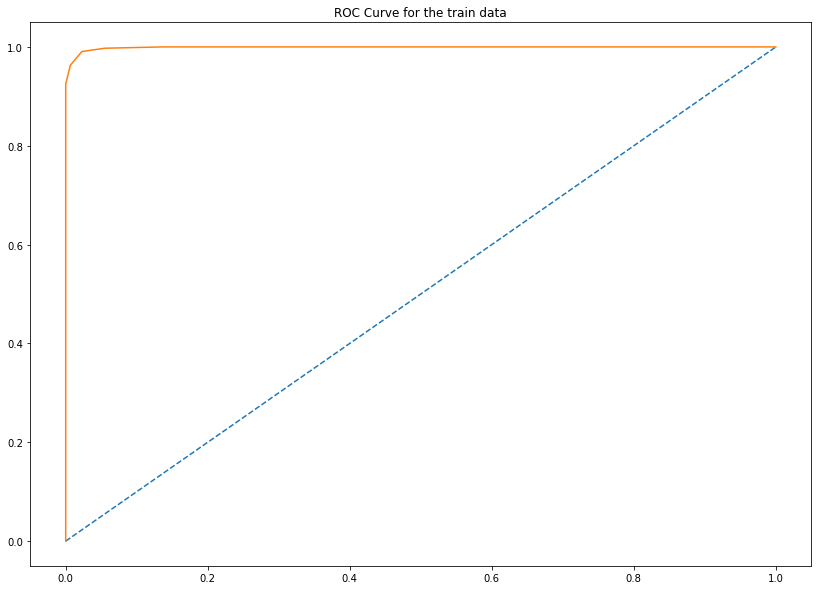

In [326]:
# predict probabilities
probs = bagging.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Bagging model for Train data: %.3f' % bag_train_auc)
# calculate roc curve
bag_train_fpr, bag_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_train_fpr, bag_train_tpr);
plt.title('ROC Curve for the train data');

AUC of the Bagging model for Test data: 0.853


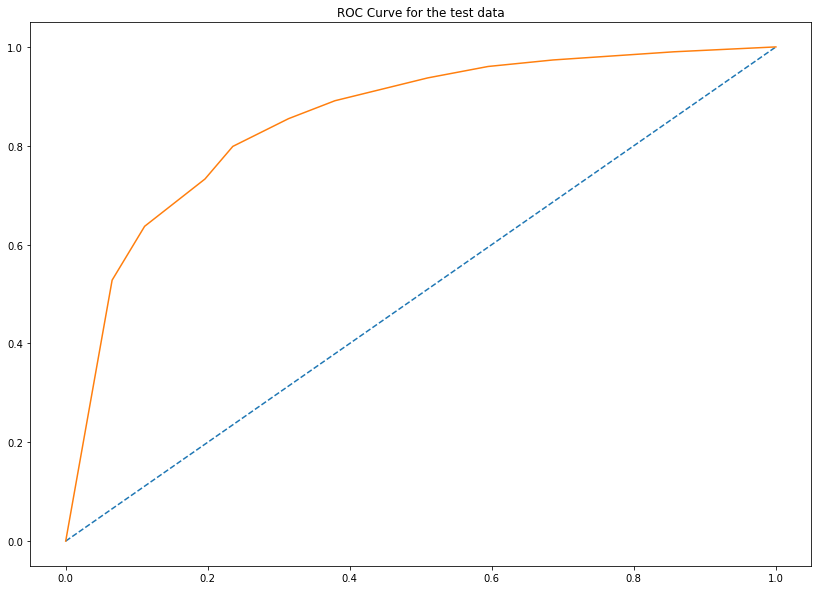

In [327]:
# predict probabilities
probs = bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Bagging model for Test data: %.3f' % bag_test_auc)
# calculate roc curve
bag_test_fpr, bag_test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_test_fpr, bag_test_tpr);
plt.title('ROC Curve for the test data');

In [328]:
bagging = BaggingClassifier(base_estimator= knn_best_model,random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(leaf_size=1,
                                                      n_neighbors=20, p=1),
                  random_state=1)

In [329]:
## Performance Matrix on train data set
y_train_bag_predict = bagging.predict(X_train)
bag_train_model_score = bagging.score(X_train, y_train)
print(bag_train_model_score)
print(confusion_matrix(y_train, y_train_bag_predict))
print(classification_report(y_train, y_train_bag_predict))

0.8322337417530632
[[179 128]
 [ 50 704]]
              precision    recall  f1-score   support

           0       0.78      0.58      0.67       307
           1       0.85      0.93      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.76      0.78      1061
weighted avg       0.83      0.83      0.82      1061



In [330]:
## Performance Matrix on test data set
y_test_bag_predict = bagging.predict(X_test)
bag_test_model_score1 = bagging.score(X_test, y_test)
print(bag_test_model_score1)
print(confusion_matrix(y_test, y_test_bag_predict))
print(classification_report(y_test, y_test_bag_predict))

0.8092105263157895
[[ 94  59]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.77      0.61      0.68       153
           1       0.82      0.91      0.86       303

    accuracy                           0.81       456
   macro avg       0.80      0.76      0.77       456
weighted avg       0.81      0.81      0.80       456



AUC of the Bagging model for Train data: 0.897


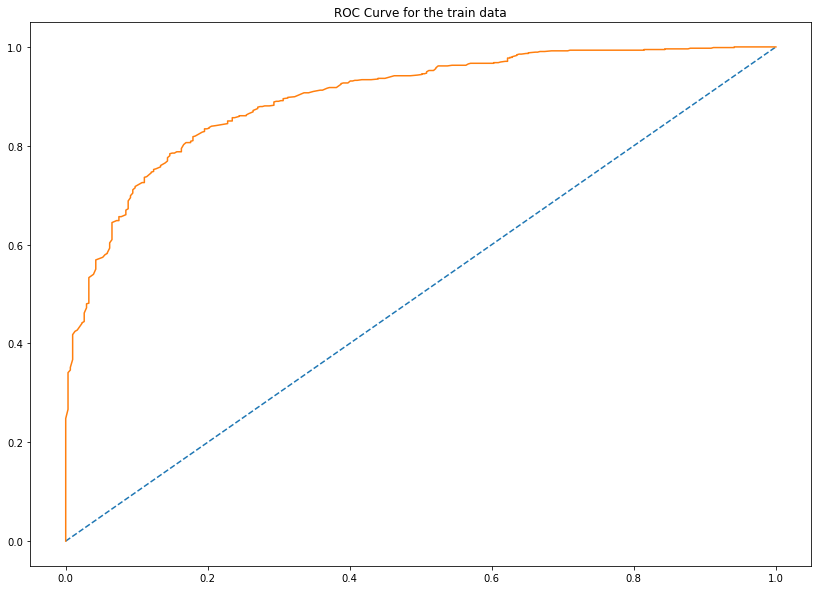

In [331]:
# predict probabilities
probs = bagging.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Bagging model for Train data: %.3f' % bag_train_auc)
# calculate roc curve
bag_train_fpr, bag_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_train_fpr, bag_train_tpr);
plt.title('ROC Curve for the train data');

AUC of the Bagging model for Test data: 0.882


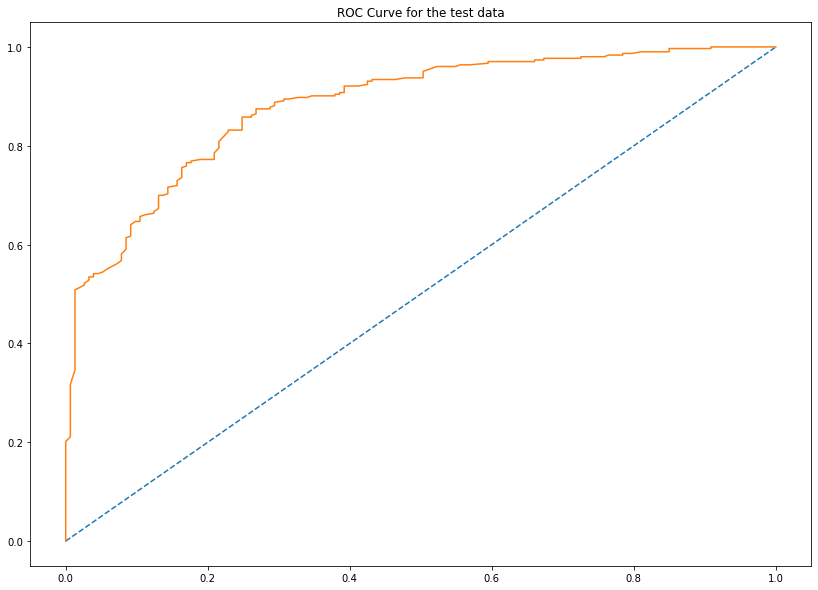

In [332]:
# predict probabilities
probs = bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Bagging model for Test data: %.3f' % bag_test_auc)
# calculate roc curve
bag_test_fpr, bag_test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_test_fpr, bag_test_tpr);
plt.title('ROC Curve for the test data');

In [333]:
bagging = BaggingClassifier(base_estimator= gnbcv_best_model,random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=GaussianNB(var_smoothing=0.0006579332246575676),
                  random_state=1)

In [334]:
y_test_bag_predict = bagging.predict(X_test)
y_train_bag_predict = bagging.predict(X_train)

In [335]:
## Performance Matrix on train data set
y_train_bag_predict = bagging.predict(X_train)
bag_train_model_score = bagging.score(X_train, y_train)
print(bag_train_model_score)
print(confusion_matrix(y_train, y_train_bag_predict))
print(classification_report(y_train, y_train_bag_predict))

0.8369462770970783
[[207 100]
 [ 73 681]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.71       307
           1       0.87      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [336]:
## Performance Matrix on test data set
y_test_bag_predict = bagging.predict(X_test)
bag_test_model_score1 = bagging.score(X_test, y_test)
print(bag_test_model_score1)
print(confusion_matrix(y_test, y_test_bag_predict))
print(classification_report(y_test, y_test_bag_predict))

0.8245614035087719
[[109  44]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC of the Bagging model for Train data: 0.888


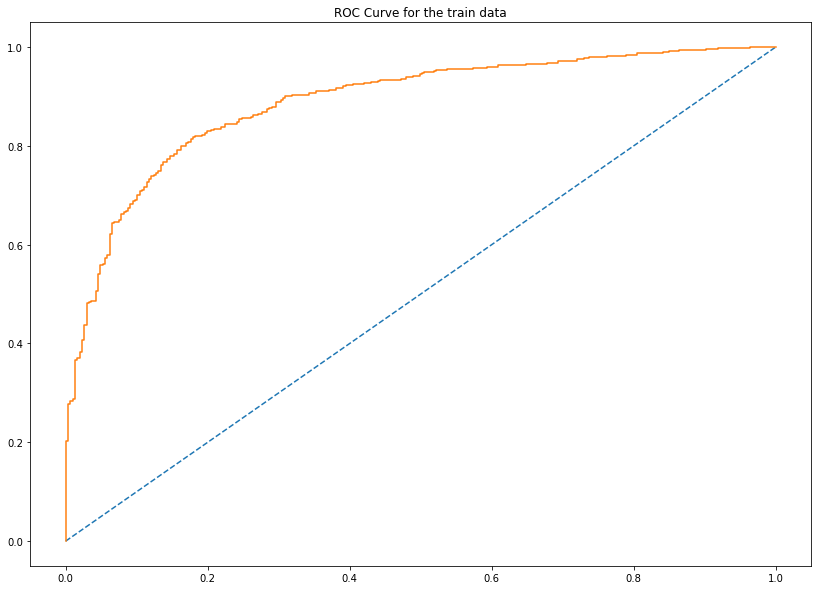

In [337]:
# predict probabilities
probs = bagging.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Bagging model for Train data: %.3f' % bag_train_auc)
# calculate roc curve
bag_train_fpr, bag_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_train_fpr, bag_train_tpr);
plt.title('ROC Curve for the train data');

AUC of the Bagging model for Test data: 0.878


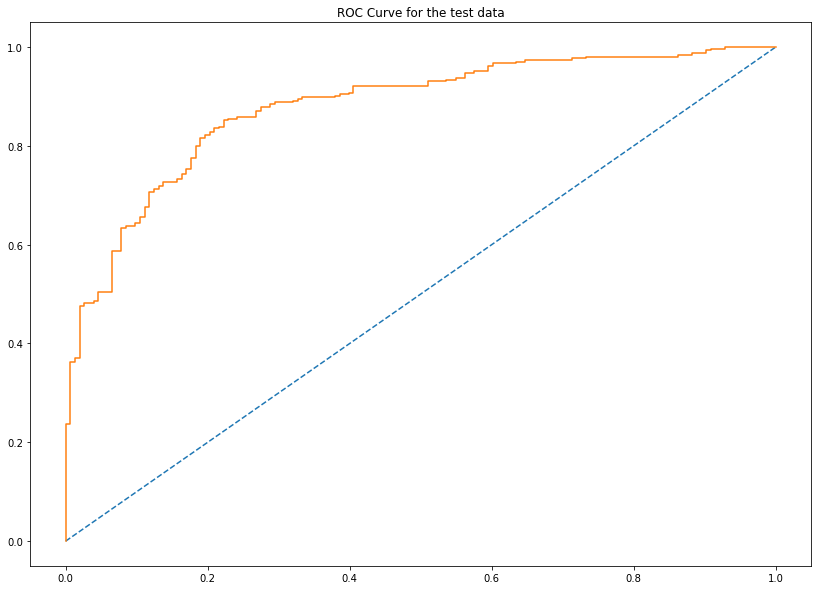

In [338]:
# predict probabilities
probs = bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Bagging model for Test data: %.3f' % bag_test_auc)
# calculate roc curve
bag_test_fpr, bag_test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_test_fpr, bag_test_tpr);
plt.title('ROC Curve for the test data');

In [489]:
bagging = BaggingClassifier(base_estimator= rf_best_model,random_state=1)
bagging.fit(X_train,y_train)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=8,
                                                        max_features=5,
                                                        min_samples_leaf=18,
                                                        min_samples_split=45,
                                                        n_estimators=101),
                  random_state=1)

In [490]:
y_test_bag_predict = bagging.predict(X_test)
y_train_bag_predict = bagging.predict(X_train)

In [491]:
## Performance Matrix on train data set
y_train_bag_predict = bagging.predict(X_train)
bag_train_model_score = bagging.score(X_train, y_train)
print(bag_train_model_score)
print('Accuracy of the Train data in Bagging using Random Forest:',bag_train_model_score)
print('Confusion matrix for Train data in Bagging using Random Forest:')
print(confusion_matrix(y_train, y_train_bag_predict))
print('Classification Report for Train data in Bagging using Random Forest:')
print(classification_report(y_train, y_train_bag_predict))

0.8397737983034873
Accuracy of the Train data in Bagging using Random Forest: 0.8397737983034873
Confusion matrix for Train data in Bagging using Random Forest:
[[188 119]
 [ 51 703]]
Classification Report for Train data in Bagging using Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69       307
           1       0.86      0.93      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.77      0.79      1061
weighted avg       0.84      0.84      0.83      1061



In [492]:
## Performance Matrix on test data set
y_test_bag_predict = bagging.predict(X_test)
bag_test_model_score1 = bagging.score(X_test, y_test)
print(bag_test_model_score1)
print('Accuracy of the Test data in Bagging using Random Forest:',bag_test_model_score1)
print('Confusion matrix for Test data in Bagging using Random Forest:')
print(confusion_matrix(y_test, y_test_bag_predict))
print('Classification Report for Test data in Bagging using Random Forest:')
print(classification_report(y_test, y_test_bag_predict))

0.8135964912280702
Accuracy of the Test data in Bagging using Random Forest: 0.8135964912280702
Confusion matrix for Test data in Bagging using Random Forest:
[[ 93  60]
 [ 25 278]]
Classification Report for Test data in Bagging using Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69       153
           1       0.82      0.92      0.87       303

    accuracy                           0.81       456
   macro avg       0.81      0.76      0.78       456
weighted avg       0.81      0.81      0.81       456



AUC of the Bagging model for Train data: 0.902


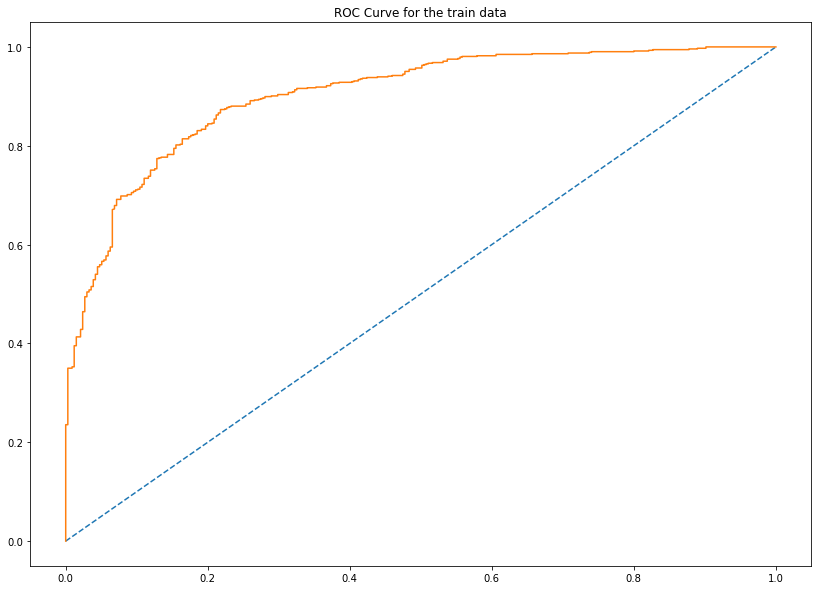

In [416]:
# predict probabilities
probs = bagging.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Bagging model for Train data: %.3f' % bag_train_auc)
# calculate roc curve
bag_train_fpr, bag_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_train_fpr, bag_train_tpr);
plt.title('ROC Curve for the train data');

AUC of the Bagging model for Test data: 0.881


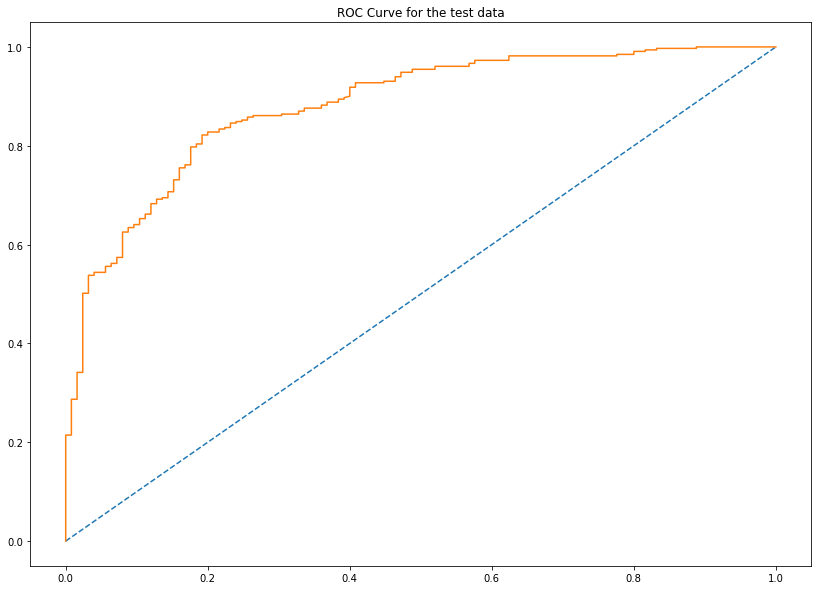

In [417]:
# predict probabilities
probs = bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Bagging model for Test data: %.3f' % bag_test_auc)
# calculate roc curve
bag_test_fpr, bag_test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_test_fpr, bag_test_tpr);
plt.title('ROC Curve for the test data');

In [419]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
bagrf_train_acc = round(accuracy_score(y_train,y_train_bag_predict),2)
bagrf_train_recall = round(recall_score(y_train,y_train_bag_predict,pos_label=1,average='binary'),2)
bagrf_train_precision = round(precision_score(y_train,y_train_bag_predict,pos_label=1,average='binary'),2)
bagrf_train_f1score = round(f1_score(y_train,y_train_bag_predict,pos_label=1,average='binary'),2)

In [420]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
bagrf_test_acc = round(accuracy_score(y_test,y_test_bag_predict),2)
bagrf_test_precision = round(precision_score(y_test,y_test_bag_predict,pos_label=1,average='binary'),2)
bagrf_test_recall = round(recall_score(y_test,y_test_bag_predict,pos_label=1,average='binary'),2)
bagrf_test_f1score = round(f1_score(y_test,y_test_bag_predict,pos_label=1,average='binary'),2)

## Model Tuning - GridSearchCV for Bagging

In [350]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [101, 301]
}

bagcl = BaggingClassifier(random_state=1)

bagcl_grid_search = GridSearchCV(estimator = bagcl, param_grid = param_grid, cv = 3)



In [351]:
bagcl_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=BaggingClassifier(random_state=1),
             param_grid={'n_estimators': [101, 301]})

In [352]:
bagcl_grid_search.best_params_

{'n_estimators': 301}

In [353]:
bagcl_best_model = bagcl_grid_search.best_estimator_
bagcl_best_model

BaggingClassifier(n_estimators=301, random_state=1)

In [354]:
y_train_bag_p = bagcl_best_model.predict(X_train)
y_test_bag_p = bagcl_best_model.predict(X_test)

In [355]:
## Performance Matrix on train data set
y_train_bag_p = bagcl_best_model.predict(X_train)
bagcv_train_model_score = bagcl_best_model.score(X_train, y_train)
print(bagcv_train_model_score)
print(confusion_matrix(y_train, y_train_bag_p))
print(classification_report(y_train, y_train_bag_p))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [356]:
## Performance Matrix on test data set
y_test_bag_p = bagcl_best_model.predict(X_test)
bagcv_test_model_score1 = bagcl_best_model.score(X_test, y_test)
print(bagcv_test_model_score1)
print(confusion_matrix(y_test, y_test_bag_p))
print(classification_report(y_test, y_test_bag_p))

0.8179824561403509
[[108  45]
 [ 38 265]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       153
           1       0.85      0.87      0.86       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



AUC of the Bagging model for Train data: 1.000


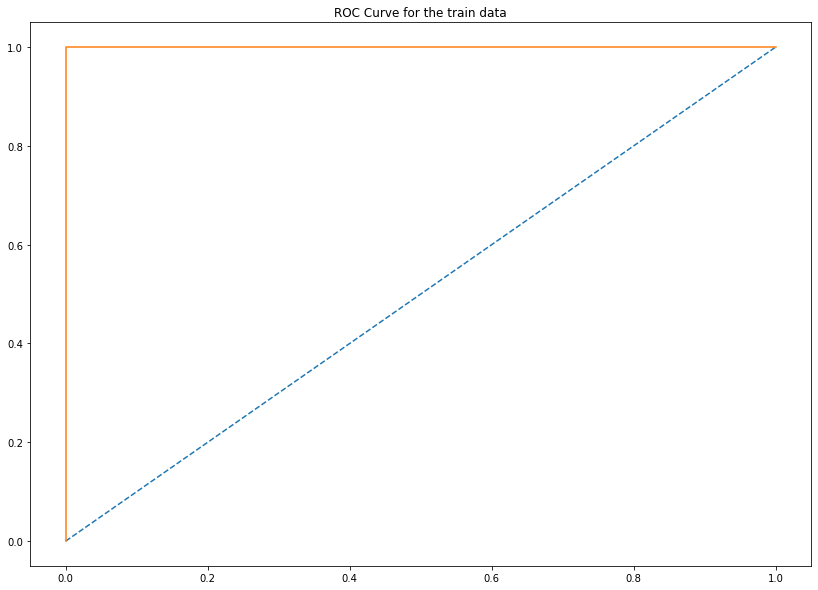

In [357]:
# predict probabilities
probs = bagcl_best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bagcv_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Bagging model for Train data: %.3f' % bagcv_train_auc)
# calculate roc curve
bagcv_train_fpr, bagcv_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bagcv_train_fpr, bagcv_train_tpr);
plt.title('ROC Curve for the train data');

AUC of the Bagging model for Test data: 0.881


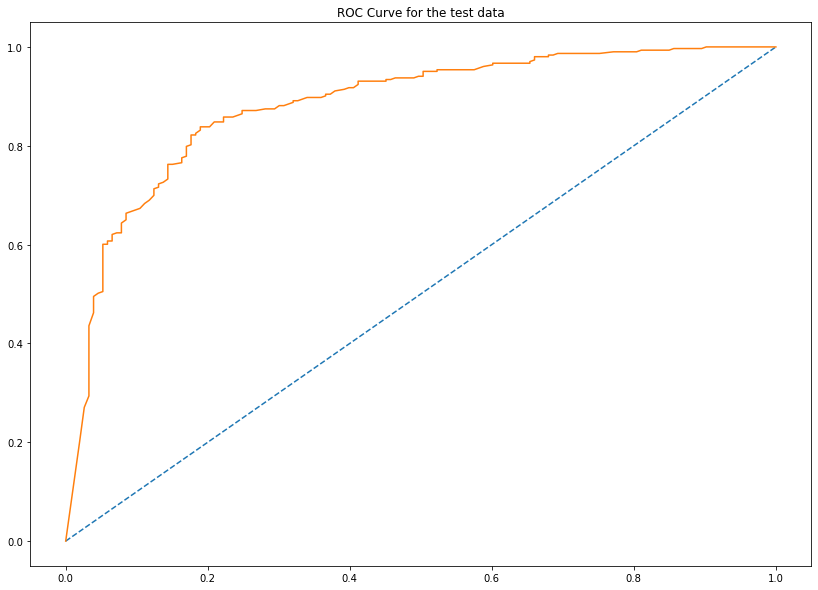

In [358]:
# predict probabilities
probs = bagcl_best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bagcv_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Bagging model for Test data: %.3f' % bagcv_test_auc)
# calculate roc curve
bagcv_test_fpr, bagcv_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bagcv_test_fpr, bagcv_test_tpr);
plt.title('ROC Curve for the test data');

In [359]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
bagcv_train_acc = round(accuracy_score(y_train,y_train_bag_p),2)
bagcv_train_recall = round(recall_score(y_train,y_train_bag_p,pos_label=1,average='binary'),2)
bagcv_train_precision = round(precision_score(y_train,y_train_bag_p,pos_label=1,average='binary'),2)
bagcv_train_f1score = round(f1_score(y_train,y_train_bag_p,pos_label=1,average='binary'),2)

In [360]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
bagcv_test_acc = round(accuracy_score(y_test,y_test_bag_p),2)
bagcv_test_precision = round(precision_score(y_test,y_test_bag_p,pos_label=1,average='binary'),2)
bagcv_test_recall = round(recall_score(y_test,y_test_bag_p,pos_label=1,average='binary'),2)
bagcv_test_f1score = round(f1_score(y_test,y_test_bag_p,pos_label=1,average='binary'),2)

In [462]:
print('Accuracy of the Train data in Bagging using GridsearchCV:',bagcv_train_acc)
print('Accuracy of the Test data in Bagging using GridsearchCV:',bagcv_test_acc)

Accuracy of the Train data in Bagging using GridsearchCV: 1.0
Accuracy of the Test data in Bagging using GridsearchCV: 0.82


## **Ensemble Learning - AdaBoosting**

In [493]:
X = election.drop('vote',axis=1)
y = election['vote']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [494]:
adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [495]:
## Performance Matrix on train data set
y_train_ada_p = adaboost.predict(X_train)
ada_train_model_score = adaboost.score(X_train, y_train)
print(ada_train_model_score)
print('Accuracy of the Train data in AdaBoosting:',ada_train_model_score)
print('Confusion matrix for Train data in AdaBoosting:')
print(confusion_matrix(y_train, y_train_ada_p))
print('Classification Report for Train data in AdaBoosting:')
print(classification_report(y_train, y_train_ada_p))

0.8407163053722903
Accuracy of the Train data in AdaBoosting: 0.8407163053722903
Confusion matrix for Train data in AdaBoosting:
[[237  98]
 [ 71 655]]
Classification Report for Train data in AdaBoosting:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       335
           1       0.87      0.90      0.89       726

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [496]:
## Performance Matrix on test data set
y_test_ada_p = adaboost.predict(X_test)
ada_test_model_score1 = adaboost.score(X_test, y_test)
print(ada_test_model_score1)
print('Accuracy of the Test data in AdaBoosting:',ada_test_model_score1)
print('Confusion matrix for Test data in AdaBoosting:')
print(confusion_matrix(y_test, y_test_ada_p))
print('Classification Report for Test data in AdaBoosting:')
print(classification_report(y_test, y_test_ada_p))

0.8289473684210527
Accuracy of the Test data in AdaBoosting: 0.8289473684210527
Confusion matrix for Test data in AdaBoosting:
[[ 81  44]
 [ 34 297]]
Classification Report for Test data in AdaBoosting:
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       125
           1       0.87      0.90      0.88       331

    accuracy                           0.83       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.83      0.83      0.83       456



AUC of the Adaptive Boosting model for Train data: 0.911


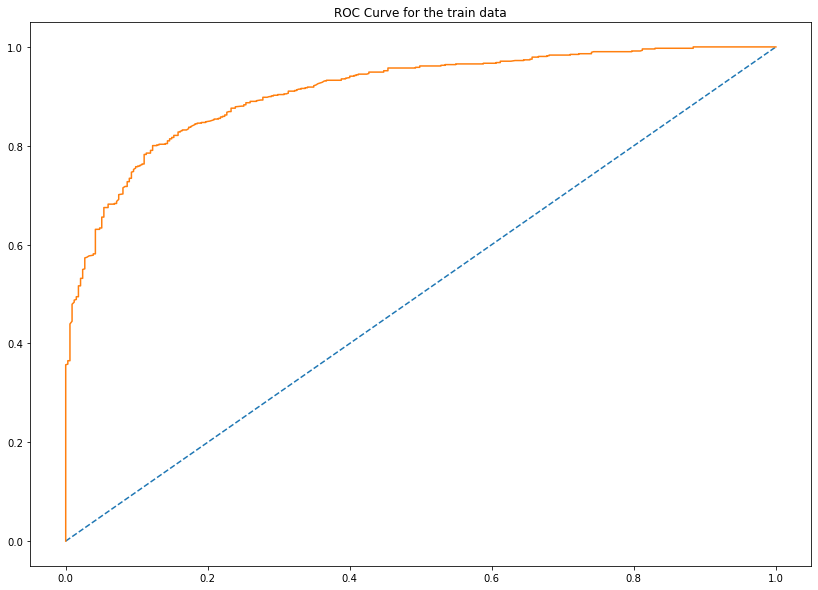

In [365]:
# predict probabilities
probs = adaboost.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Adaptive Boosting model for Train data: %.3f' % ada_train_auc)
# calculate roc curve
ada_train_fpr, ada_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_train_fpr, ada_train_tpr);
plt.title('ROC Curve for the train data');

AUC of the Adaptive Boosting model for Test data: 0.886


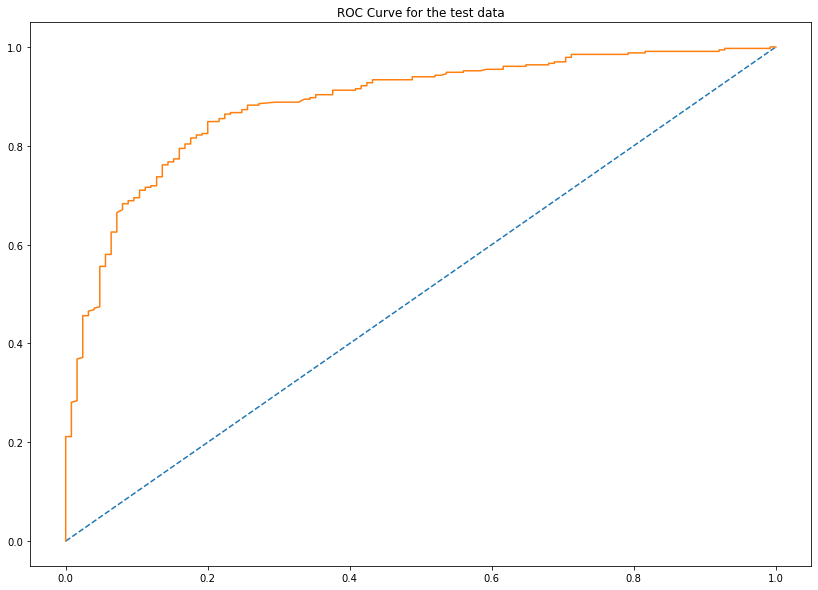

In [366]:
# predict probabilities
probs = adaboost.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Adaptive Boosting model for Test data: %.3f' % ada_test_auc)
# calculate roc curve
ada_test_fpr, ada_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_test_fpr, ada_test_tpr);
plt.title('ROC Curve for the test data');

## Model Tuning - GridSearchCV for AdaBoosting

In [367]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [101, 301]
}

ada = AdaBoostClassifier()

ada_grid_search = GridSearchCV(estimator = ada, param_grid = param_grid, cv = 3)

In [368]:
ada_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [101, 301]})

In [369]:
ada_grid_search.best_params_

{'n_estimators': 101}

In [370]:
ada_best_model = ada_grid_search.best_estimator_
ada_best_model

AdaBoostClassifier(n_estimators=101)

In [371]:
y_train_adacv_p = ada_best_model.predict(X_train)
y_test_adacv_p = ada_best_model.predict(X_test)

In [372]:
## Performance Matrix on train data set
y_train_adacv_p = ada_best_model.predict(X_train)
adacv_train_model_score = ada_best_model.score(X_train, y_train)
print(adacv_train_model_score)
print(confusion_matrix(y_train, y_train_adacv_p))
print(classification_report(y_train, y_train_adacv_p))

0.8426013195098964
[[235 100]
 [ 67 659]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       335
           1       0.87      0.91      0.89       726

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [373]:
## Performance Matrix on test data set
y_test_adacv_p = ada_best_model.predict(X_test)
adacv_test_model_score1 = ada_best_model.score(X_test, y_test)
print(adacv_test_model_score1)
print(confusion_matrix(y_test, y_test_adacv_p))
print(classification_report(y_test, y_test_adacv_p))

0.8377192982456141
[[ 83  42]
 [ 32 299]]
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       125
           1       0.88      0.90      0.89       331

    accuracy                           0.84       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.84      0.84       456



AUC of the Adaptive Boosting model for Train data: 0.915


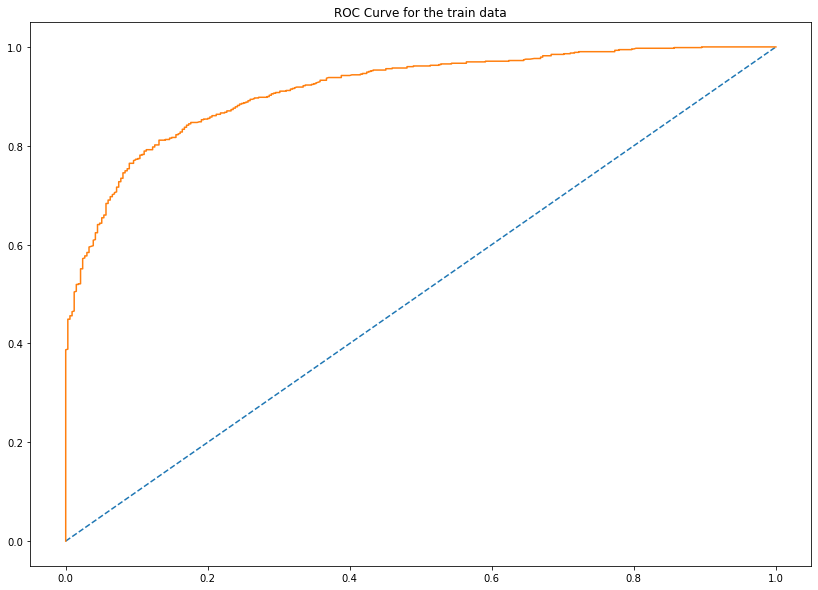

In [374]:
# predict probabilities
probs = ada_best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adacv_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Adaptive Boosting model for Train data: %.3f' % adacv_train_auc)
# calculate roc curve
adacv_train_fpr, adacv_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adacv_train_fpr, adacv_train_tpr);
plt.title('ROC Curve for the train data');

AUC of the Adaptive Boosting model for Test data: 0.882


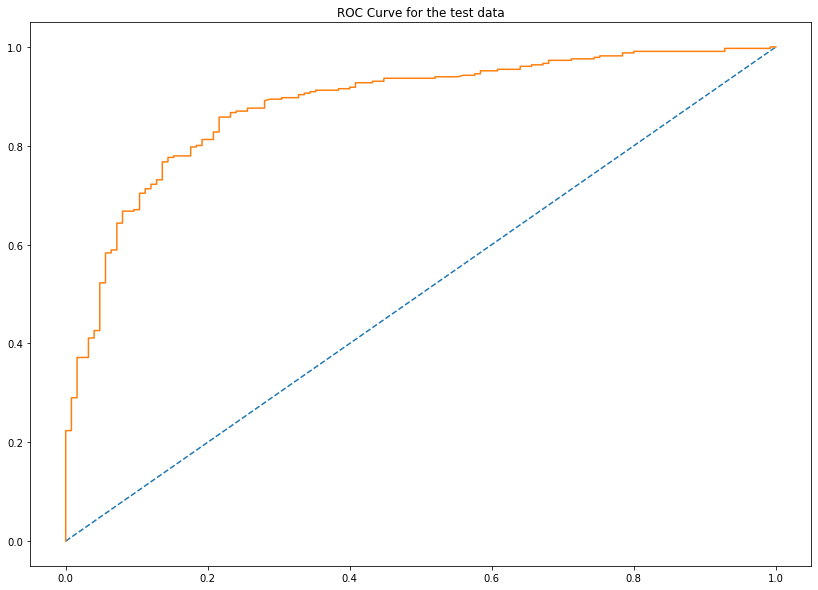

In [375]:
# predict probabilities
probs = ada_best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adacv_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Adaptive Boosting model for Test data: %.3f' % adacv_test_auc)
# calculate roc curve
adacv_test_fpr, adacv_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adacv_test_fpr, adacv_test_tpr);
plt.title('ROC Curve for the test data');

In [376]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
adacv_train_acc = round(accuracy_score(y_train,y_train_adacv_p),2)
adacv_train_recall = round(recall_score(y_train,y_train_adacv_p,pos_label=1,average='binary'),2)
adacv_train_precision = round(precision_score(y_train,y_train_adacv_p,pos_label=1,average='binary'),2)
adacv_train_f1score = round(f1_score(y_train,y_train_adacv_p,pos_label=1,average='binary'),2)

In [377]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
adacv_test_acc = round(accuracy_score(y_test,y_test_adacv_p),2)
adacv_test_precision = round(precision_score(y_test,y_test_adacv_p,pos_label=1,average='binary'),2)
adacv_test_recall = round(recall_score(y_test,y_test_adacv_p,pos_label=1,average='binary'),2)
adacv_test_f1score = round(f1_score(y_test,y_test_adacv_p,pos_label=1,average='binary'),2)

In [467]:
print('Accuracy of the Train data in AdaBoosting using GridsearchCV:',adacv_train_acc)
print('Accuracy of the Test data in AdaBoosting using GridsearchCV:',adacv_test_acc)

Accuracy of the Train data in AdaBoosting using GridsearchCV: 0.84
Accuracy of the Test data in AdaBoosting using GridsearchCV: 0.84


## **Ensemble Learning - GradientBoosting**

In [497]:
gbcl = GradientBoostingClassifier(random_state=1)
gbcl.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [498]:
y_train_gb_p = gbcl.predict(X_train)
y_test_gb_p = gbcl.predict(X_test)

In [499]:
## Performance Matrix on train data set
y_train_gb_p = gbcl.predict(X_train)
gb_train_model_score = gbcl.score(X_train, y_train)
print(gb_train_model_score)
print('Accuracy of the Train data in Gradient Boosting:',gb_train_model_score)
print('Confusion matrix for Train data in Gradient Boosting:')
print(confusion_matrix(y_train, y_train_gb_p))
print('Classification Report for Train data in Gradient Boosting:')
print(classification_report(y_train, y_train_gb_p))

0.8868991517436381
Accuracy of the Train data in Gradient Boosting: 0.8868991517436381
Confusion matrix for Train data in Gradient Boosting:
[[261  74]
 [ 46 680]]
Classification Report for Train data in Gradient Boosting:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       335
           1       0.90      0.94      0.92       726

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [500]:
## Performance Matrix on test data set
y_test_gb_p = gbcl.predict(X_test)
gb_test_model_score1 = gbcl.score(X_test, y_test)
print(gb_test_model_score1)
print('Accuracy of the Test data in Gradient Boosting:',gb_test_model_score1)
print('Confusion matrix for Test data in Gradient Boosting:')
print(confusion_matrix(y_test, y_test_gb_p))
print('Classification Report for Test data in Gradient Boosting:')
print(classification_report(y_test, y_test_gb_p))

0.8377192982456141
Accuracy of the Test data in Gradient Boosting: 0.8377192982456141
Confusion matrix for Test data in Gradient Boosting:
[[ 83  42]
 [ 32 299]]
Classification Report for Test data in Gradient Boosting:
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       125
           1       0.88      0.90      0.89       331

    accuracy                           0.84       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.84      0.84       456



AUC of the Random Forest model for Train data: 0.952


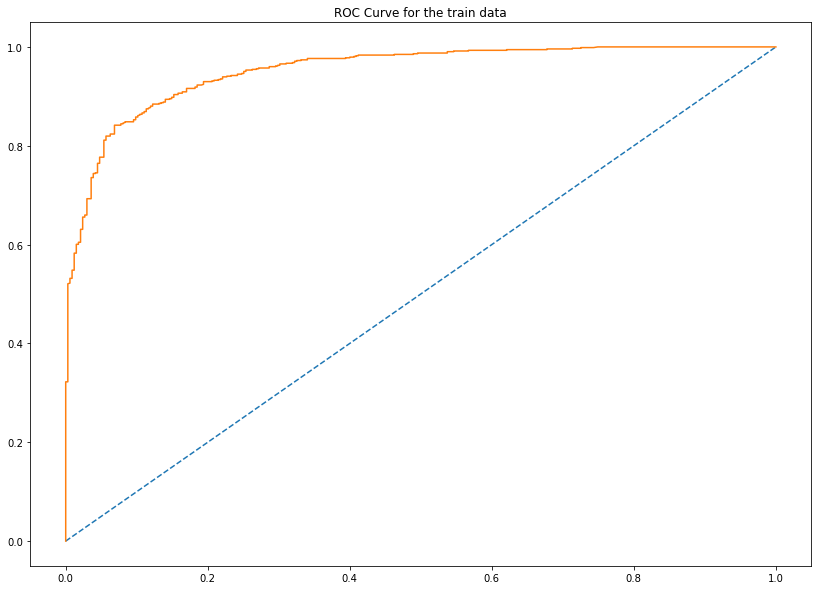

In [383]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gl_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Random Forest model for Train data: %.3f' % gl_train_auc)
# calculate roc curve
gl_train_fpr, gl_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gl_train_fpr, gl_train_tpr);
plt.title('ROC Curve for the train data');

AUC of the Random Forest model for Test data: 0.885


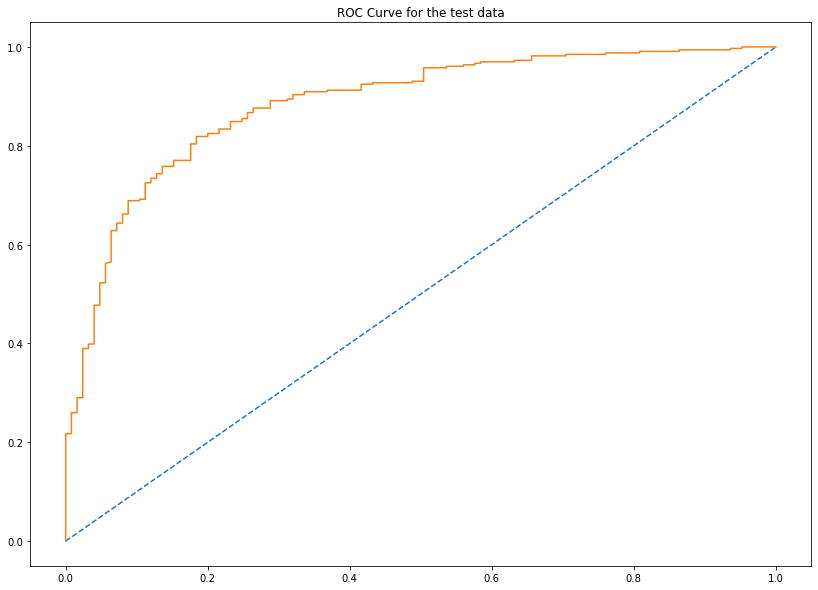

In [384]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gl_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Random Forest model for Test data: %.3f' % gl_test_auc)
# calculate roc curve
gl_test_fpr, gl_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gl_test_fpr, gl_test_tpr);
plt.title('ROC Curve for the test data');

## Model Tuning - GridSearchCV for Gradient Boosting

In [385]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [101, 301],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,3,5],
    'max_depth':[3,4]
}

gbcl = GradientBoostingClassifier()

gb_grid_search = GridSearchCV(estimator = gbcl, param_grid = param_grid, cv = 3)

In [386]:
gb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [101, 301]})

In [387]:
gb_grid_search.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 101}

In [388]:
gb_best_model = gb_grid_search.best_estimator_
gb_best_model

GradientBoostingClassifier(n_estimators=101)

In [389]:
y_train_gbcv_p = gb_best_model.predict(X_train)
y_test_gbcv_p = gb_best_model.predict(X_test)

In [390]:
## Performance Matrix on train data set
y_train_gbcv_p = gb_best_model.predict(X_train)
gbcv_train_model_score = gb_best_model.score(X_train, y_train)
print(gbcv_train_model_score)
print(confusion_matrix(y_train, y_train_gbcv_p))
print(classification_report(y_train, y_train_gbcv_p))

0.8897266729500471
[[261  74]
 [ 43 683]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       335
           1       0.90      0.94      0.92       726

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [391]:
## Performance Matrix on test data set
y_test_gbcv_p = gb_best_model.predict(X_test)
gbcv_test_model_score1 = gb_best_model.score(X_test, y_test)
print(gbcv_test_model_score1)
print(confusion_matrix(y_test, y_test_gbcv_p))
print(classification_report(y_test, y_test_gbcv_p))

0.8399122807017544
[[ 83  42]
 [ 31 300]]
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       125
           1       0.88      0.91      0.89       331

    accuracy                           0.84       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.84      0.84      0.84       456



AUC of the Random Forest model for Train data: 0.952


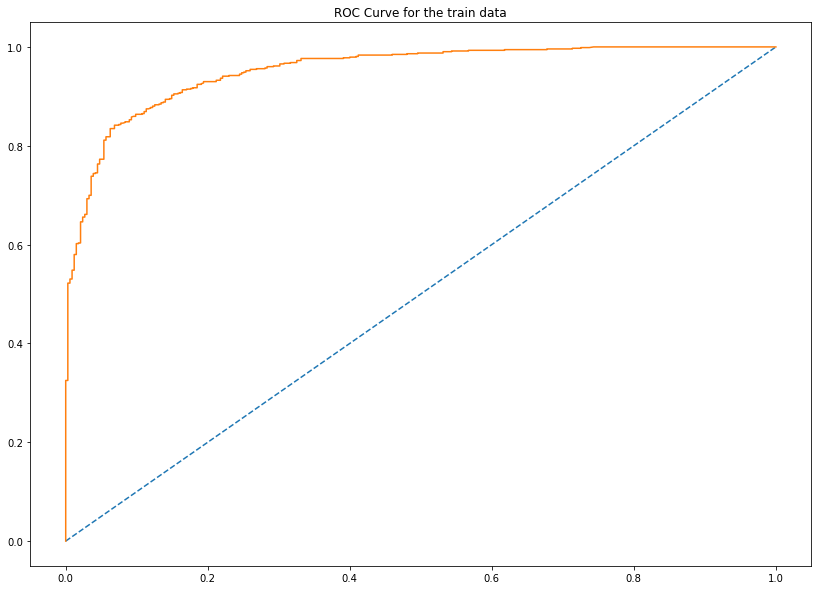

In [392]:
# predict probabilities
probs = gb_best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcv_train_auc = roc_auc_score(y_train, probs)
print('AUC of the Random Forest model for Train data: %.3f' % gbcv_train_auc)
# calculate roc curve
gbcv_train_fpr, gbcv_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcv_train_fpr, gbcv_train_tpr);
plt.title('ROC Curve for the train data');

AUC of the Random Forest model for Test data: 0.885


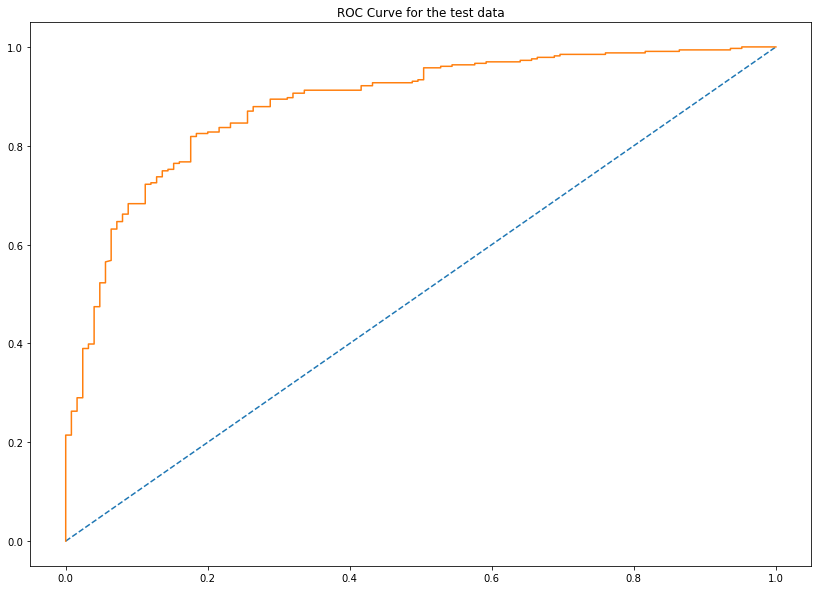

In [393]:
# predict probabilities
probs = gb_best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcv_test_auc = roc_auc_score(y_test, probs)
print('AUC of the Random Forest model for Test data: %.3f' % gbcv_test_auc)
# calculate roc curve
gbcv_test_fpr, gbcv_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcv_test_fpr, gbcv_test_tpr);
plt.title('ROC Curve for the test data');

In [394]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
gbcv_train_acc = round(accuracy_score(y_train,y_train_gbcv_p),2)
gbcv_train_recall = round(recall_score(y_train,y_train_gbcv_p,pos_label=1,average='binary'),2)
gbcv_train_precision = round(precision_score(y_train,y_train_gbcv_p,pos_label=1,average='binary'),2)
gbcv_train_f1score = round(f1_score(y_train,y_train_gbcv_p,pos_label=1,average='binary'),2)

In [395]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
gbcv_test_acc = round(accuracy_score(y_test,y_test_gbcv_p),2)
gbcv_test_precision = round(precision_score(y_test,y_test_gbcv_p,pos_label=1,average='binary'),2)
gbcv_test_recall = round(recall_score(y_test,y_test_gbcv_p,pos_label=1,average='binary'),2)
gbcv_test_f1score = round(f1_score(y_test,y_test_gbcv_p,pos_label=1,average='binary'),2)

In [473]:
print('Accuracy of the Train data in Gradient Boosting using GridsearchCV:',gbcv_train_acc)
print('Accuracy of the Train data in Gradient Boosting using GridsearchCV:',gbcv_test_acc)

Accuracy of the Train data in Gradient Boosting using GridsearchCV: 0.89
Accuracy of the Train data in Gradient Boosting using GridsearchCV: 0.84


In [421]:
df = pd.DataFrame(data = [[rfcv_train_acc,rfcv_test_acc,bagrf_train_acc,bagrf_test_acc,adacv_train_acc,adacv_test_acc,gbcv_train_acc,gbcv_test_acc],
                         [rfcv_train_auc,rfcv_test_auc,bag_train_auc,bag_test_auc,adacv_train_auc,adacv_test_auc,gbcv_train_auc,gbcv_test_auc], 
                         [rfcv_train_recall,rfcv_test_recall,bagrf_train_recall,bagrf_test_recall,adacv_train_recall,adacv_test_recall,gbcv_train_recall,gbcv_test_recall],
                         [rfcv_train_precision,rfcv_test_precision,bagrf_train_precision,bagrf_test_precision,adacv_train_precision,adacv_test_precision,gbcv_train_precision,gbcv_test_precision],
                         [rfcv_train_f1score,rfcv_test_f1score,bagrf_train_f1score,bagrf_test_f1score,adacv_train_f1score,adacv_test_f1score,gbcv_train_f1score,gbcv_test_f1score]],
                   columns=['RF Train', 'RF Test','Bagging Train','Bagging Test', 'AdaBoost Train', 'AdaBoost Test','GradientBoost Train','GradientBoost Test'],
                   index=['Accuracy','AUC Score','Recall','Precision','F1 Score'])
round(df,2)

RF Train  RF Test  Bagging Train  Bagging Test  AdaBoost Train  \
Accuracy       0.85     0.83           0.84          0.83            0.84   
AUC Score      0.91     0.89           0.90          0.88            0.91   
Recall         0.92     0.91           0.91          0.92            0.91   
Precision      0.88     0.84           0.86          0.86            0.87   
F1 Score       0.90     0.87           0.89          0.89            0.89   

           AdaBoost Test  GradientBoost Train  GradientBoost Test  
Accuracy            0.84                 0.89                0.84  
AUC Score           0.88                 0.95                0.88  
Recall              0.90                 0.94                0.91  
Precision           0.88                 0.90                0.88  
F1 Score            0.89                 0.92                0.89

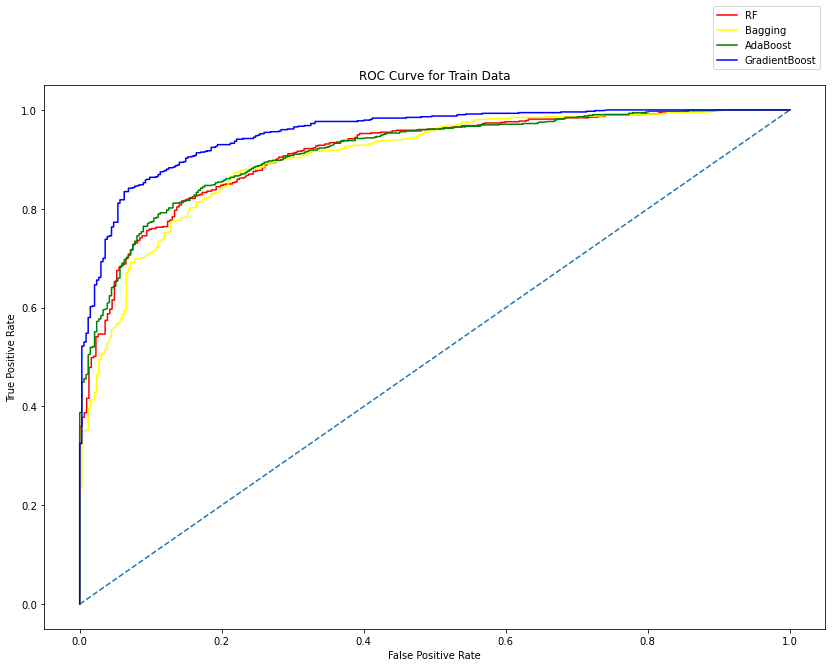

In [422]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rfcv_train_fpr, rfcv_train_tpr,color='red',label="RF")
plt.plot(bag_train_fpr, bag_train_tpr,color='yellow',label="Bagging")
plt.plot(adacv_train_fpr,adacv_train_tpr,color='green',label="AdaBoost")
plt.plot(gbcv_train_fpr,gbcv_train_tpr,color='blue',label="GradientBoost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

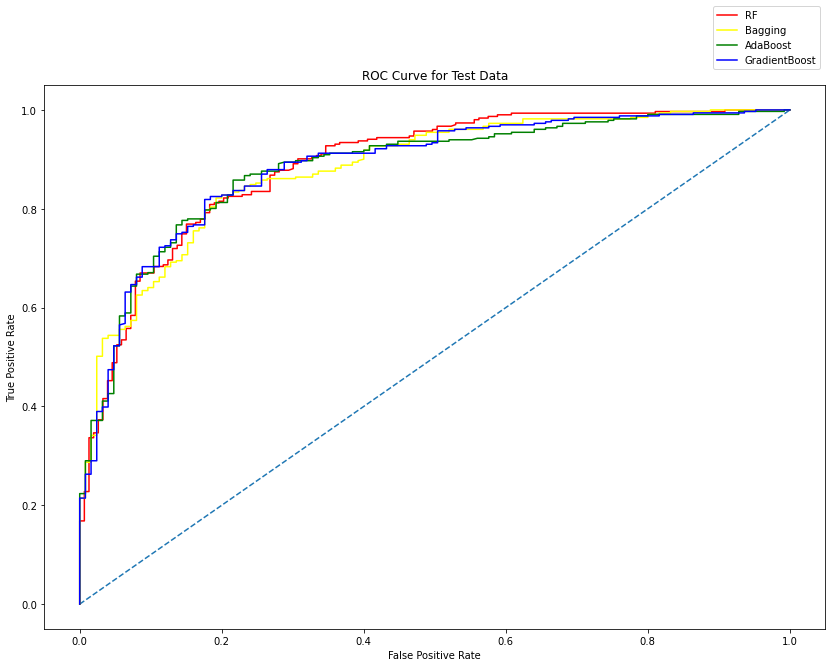

In [423]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rfcv_test_fpr, rfcv_test_tpr,color='red',label="RF")
plt.plot(bag_test_fpr, bag_test_tpr,color='yellow',label="Bagging")
plt.plot(adacv_test_fpr,adacv_test_tpr,color='green',label="AdaBoost")
plt.plot(gbcv_test_fpr,gbcv_test_tpr,color='blue',label="GradientBoost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [434]:
df = pd.DataFrame(data = [[logr_train_acc,logr_test_acc,ldacv_train_acc,ldacv_test_acc,knn_train_acc,knn_test_acc,gnbcv_train_acc,gnbcv_test_acc,rfcv_train_acc,rfcv_test_acc,bagcv_train_acc,bagcv_test_acc,adacv_train_acc,adacv_test_acc,gbcv_train_acc,gbcv_test_acc],
                             [logr_train_auc,logr_test_auc,ldacv_train_auc,ldacv_test_auc,knn_train_auc,knn_test_auc,gnb_train_auc,gnb_test_auc,rfcv_train_auc,rfcv_test_auc,bag_train_auc,bag_test_auc,adacv_train_auc,adacv_test_auc,gbcv_train_auc,gbcv_test_auc],
                             [logr_train_recall,logr_test_recall,ldacv_train_recall,ldacv_test_recall,knn_train_recall,knn_test_recall,gnbcv_train_recall,gnbcv_test_recall,rfcv_train_recall,rfcv_test_recall,bagcv_train_recall,bagcv_test_recall,adacv_train_recall,adacv_test_recall,gbcv_train_recall,gbcv_test_recall],
                             [logr_train_precision,logr_test_precision,ldacv_train_precision,ldacv_test_precision,knn_train_precision,knn_test_precision,gnbcv_train_precision,gnbcv_test_precision,rfcv_train_precision,rfcv_test_precision,bagcv_train_precision,bagcv_test_precision,adacv_train_precision,adacv_test_precision,gbcv_train_precision,gbcv_test_precision],
                             [logr_train_f1score,logr_test_f1score,ldacv_train_f1score,ldacv_test_f1score,knn_train_f1score,knn_test_f1score,gnbcv_train_f1score,gnbcv_test_f1score,rfcv_train_f1score,rfcv_test_f1score,adacv_train_f1score,bagcv_train_f1score,bagcv_test_f1score,adacv_test_f1score,gbcv_train_f1score,gbcv_test_f1score]],
                   columns=['Logit Train', 'Logit Test', 'LDA Train', 'LDA Test','KNN Train', 'KNN Test', 'Gaussian NB Train', 'Gaussian NB Test','RF Train', 'RF Test', 
                            'Bagging Train','Bagging Test','AdaBoost Train', 'AdaBoost Test','GradientBoost Train','GradientBoost Test'],
                   index=['Accuracy','AUC Score','Recall','Precision','F1 Score'])
round(df,2)

Logit Train  Logit Test  LDA Train  LDA Test  KNN Train  KNN Test  \
Accuracy          0.84        0.83       0.83      0.83       0.84      0.83   
AUC Score         0.89        0.88       0.89      0.89       0.90      0.90   
Recall            0.92        0.88       0.91      0.89       0.90      0.89   
Precision         0.86        0.86       0.86      0.86       0.88      0.86   
F1 Score          0.89        0.87       0.89      0.88       0.89      0.88   

           Gaussian NB Train  Gaussian NB Test  RF Train  RF Test  \
Accuracy                0.83              0.85      0.85     0.83   
AUC Score               0.88              0.90      0.91     0.89   
Recall                  0.89              0.91      0.92     0.91   
Precision               0.86              0.89      0.88     0.84   
F1 Score                0.88              0.90      0.90     0.87   

           Bagging Train  Bagging Test  AdaBoost Train  AdaBoost Test  \
Accuracy            1.00          0.82            0.84           0.84   
AUC Score           0.90          0.88            0.91           0.88   
Recall              1.00          0.87            0.91           0.90   
Precision           1.00          0.85            0.87           0.88   
F1 Score            0.89          1.00            0.86           0.89   

           GradientBoost Train  GradientBoost Test  
Accuracy                  0.89                0.84  
AUC Score                 0.95                0.88  
Recall                    0.94                0.91  
Precision                 0.90                0.88  
F1 Score                  0.92                0.89

In [501]:
df = pd.DataFrame(data = [[gbcv_train_acc,gbcv_test_acc],
                             [gbcv_train_auc,gbcv_test_auc],
                             [gbcv_train_recall,gbcv_test_recall],
                             [gbcv_train_precision,gbcv_test_precision],
                             [gbcv_train_f1score,gbcv_test_f1score]],
                   columns=['GradientBoost Train','GradientBoost Test'],
                   index=['Accuracy','AUC Score','Recall','Precision','F1 Score'])
round(df,2)

GradientBoost Train  GradientBoost Test
Accuracy                  0.89                0.84
AUC Score                 0.95                0.88
Recall                    0.94                0.91
Precision                 0.90                0.88
F1 Score                  0.92                0.89

In [502]:
df = pd.DataFrame(data = [[gnbcv_train_acc,gnbcv_test_acc],
                             [gnb_train_auc,gnb_test_auc],
                             [gnbcv_train_recall,gnbcv_test_recall],
                             [gnbcv_train_precision,gnbcv_test_precision],
                             [gnbcv_train_f1score,gnbcv_test_f1score]],
                   columns=['Gradient NB Train','Gradient NB Test'],
                   index=['Accuracy','AUC Score','Recall','Precision','F1 Score'])
round(df,2)

Gradient NB Train  Gradient NB Test
Accuracy                0.83              0.85
AUC Score               0.88              0.90
Recall                  0.89              0.91
Precision               0.86              0.89
F1 Score                0.88              0.90

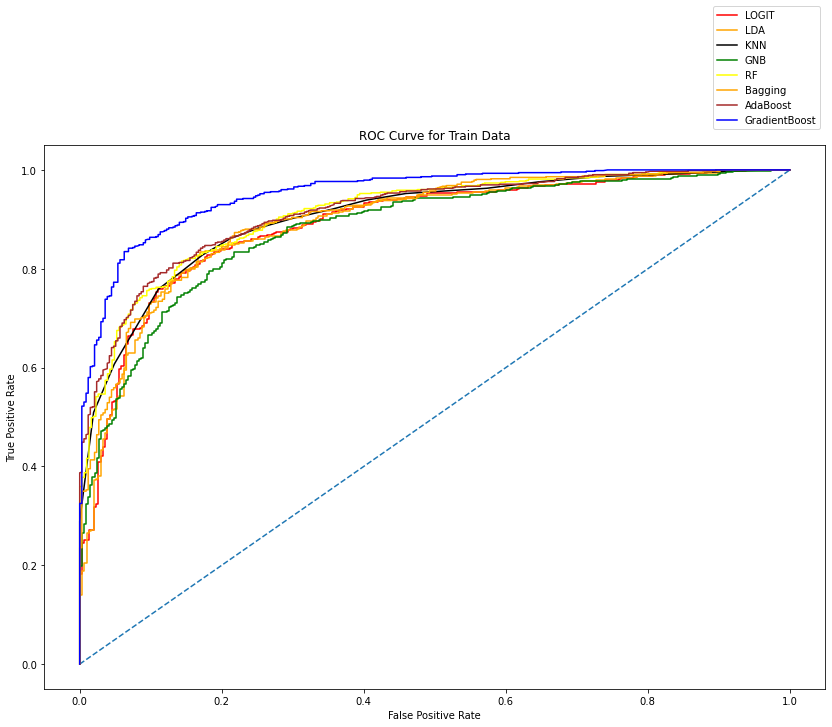

In [435]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logr_train_fpr, logr_train_tpr,color='red',label="LOGIT")
plt.plot(lda_train_fpr,lda_train_tpr,color='orange',label="LDA")
plt.plot(knn_train_fpr, knn_train_tpr,color='black',label="KNN")
plt.plot(gnb_train_fpr,gnb_train_tpr,color='green',label="GNB")
plt.plot(rfcv_train_fpr, rfcv_train_tpr,color='yellow',label="RF")
plt.plot(bag_train_fpr, bag_train_tpr,color='orange',label="Bagging")
plt.plot(adacv_train_fpr,adacv_train_tpr,color='brown',label="AdaBoost")
plt.plot(gbcv_train_fpr,gbcv_train_tpr,color='blue',label="GradientBoost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

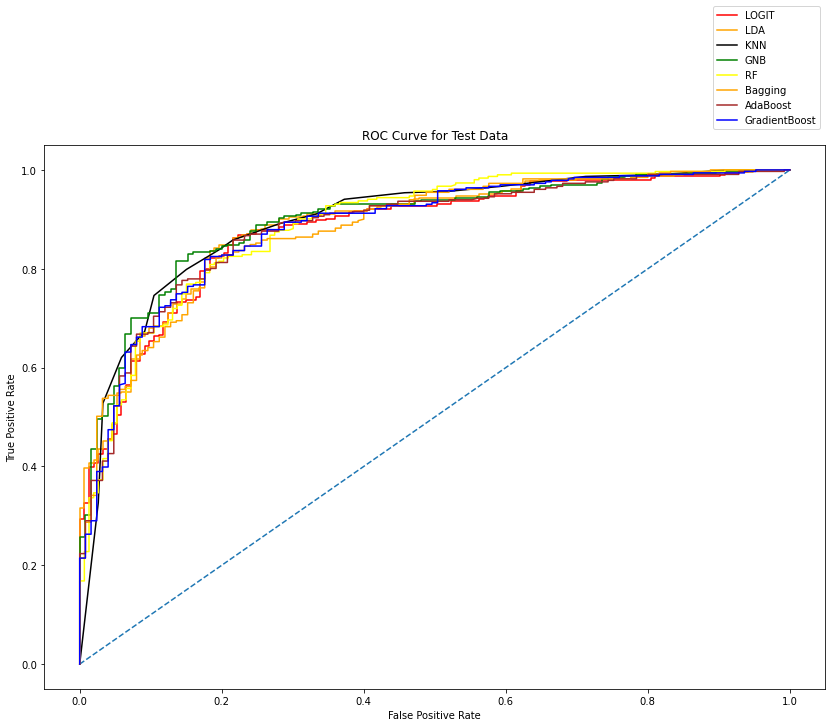

In [436]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logr_test_fpr, logr_test_tpr,color='red',label="LOGIT")
plt.plot(lda_test_fpr,lda_test_tpr,color='orange',label="LDA")
plt.plot(knn_test_fpr, knn_test_tpr,color='black',label="KNN")
plt.plot(gnb_test_fpr,gnb_test_tpr,color='green',label="GNB")
plt.plot(rfcv_test_fpr, rfcv_test_tpr,color='yellow',label="RF")
plt.plot(bag_test_fpr, bag_test_tpr,color='orange',label="Bagging")
plt.plot(adacv_test_fpr,adacv_test_tpr,color='brown',label="AdaBoost")
plt.plot(gbcv_test_fpr,gbcv_test_tpr,color='blue',label="GradientBoost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')